<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

In [ ]:
# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PGP-AIML/Machine Learning/Project4/Neural_Network_Bank_Churn.csv')

## Data Overview

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
# Missing values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
# Check the Target value, Exited, count
df['Exited'].value_counts(1)

,proportion
Exited,
0,0.7963
1,0.2037


The dataset has 79.63% of customers that have not exited and 20.37% Exited customers.

In [ ]:
#Dropping these columns as they are unique and does not help in the analysis
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Summary of Data Overview

* There are no missing values in any of the columns, which is great for analysis as no imputation is required.
* RowNumber and CustomerId are unique for each record, meaning they are identifiers and can be dropped for modeling.
* Surname has 2932 unique values, which suggests it may not be very useful for predicting churn & so can be dropped
* Geography (3 unique values) and Gender (2 unique values) are categorical variables that may need encoding.

*  Credit Score: The average credit score is 650, with values ranging from 350 to 850, showing a broad variation in customer creditworthiness.
*  Age: The average age is 39 years, with a minimum of 18 years and a maximum of 92 years, indicating a diverse age range among customers.
*  Tenure: The average tenure is 5 years, with customers staying anywhere from 0 to 10 years, which may influence churn behavior.
*  Balance: The average account balance is 76,485, with a high standard deviation of 62,397, and some customers have a 0 balance.
*  NumOfProducts: The average number of products held is 1.53, with customers having between 1 and 4 products, which may impact loyalty and churn.
*  HasCrCard: 70.55% of customers have a credit card, while 29.45% do not.
*  IsActiveMember: 51.51% of customers are active, while 48.49% are inactive, which could be a factor in churn.
*  Estimated Salary: The average estimated salary is 100,090, ranging from 11.58 to 199,992, showing a wide salary distribution.
* Exited: 20.37% of customers have churned(from the mean), indicating potential class imbalance that needs to be addressed in modeling.

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

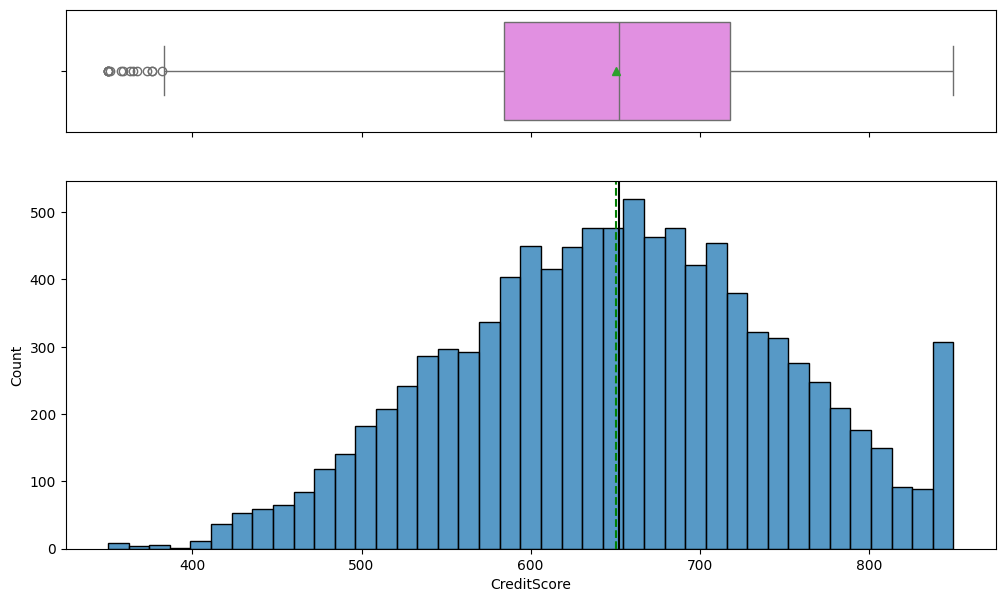

In [ ]:
histogram_boxplot(df,'CreditScore')


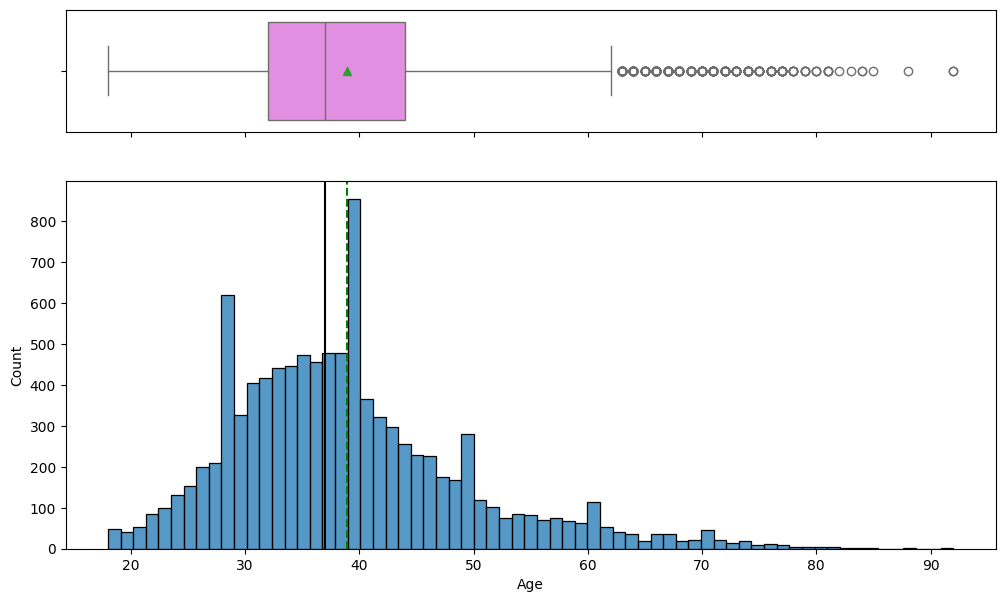

In [ ]:
histogram_boxplot(df,'Age')


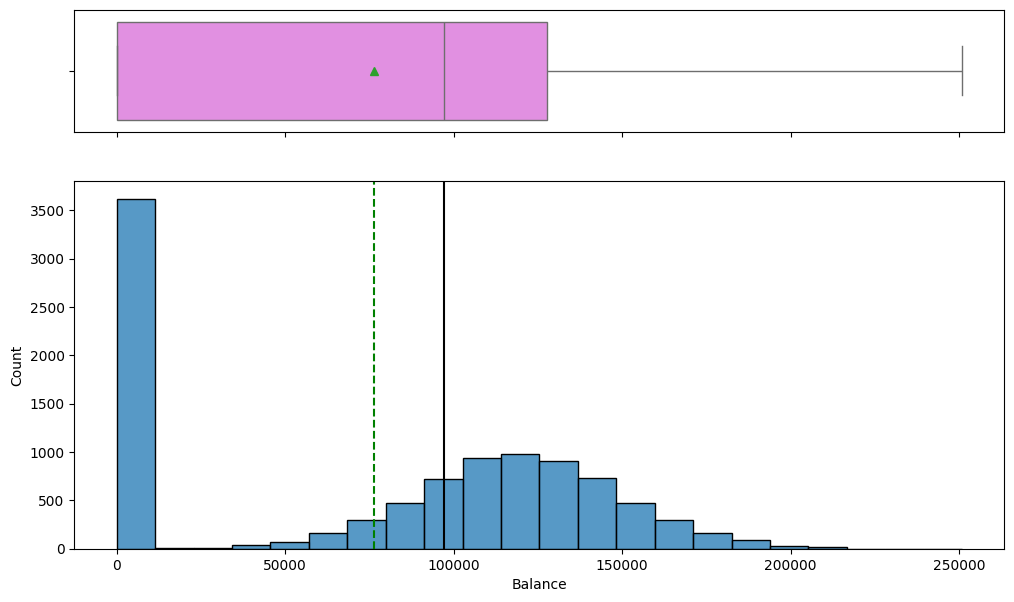

In [ ]:
histogram_boxplot(df,'Balance')

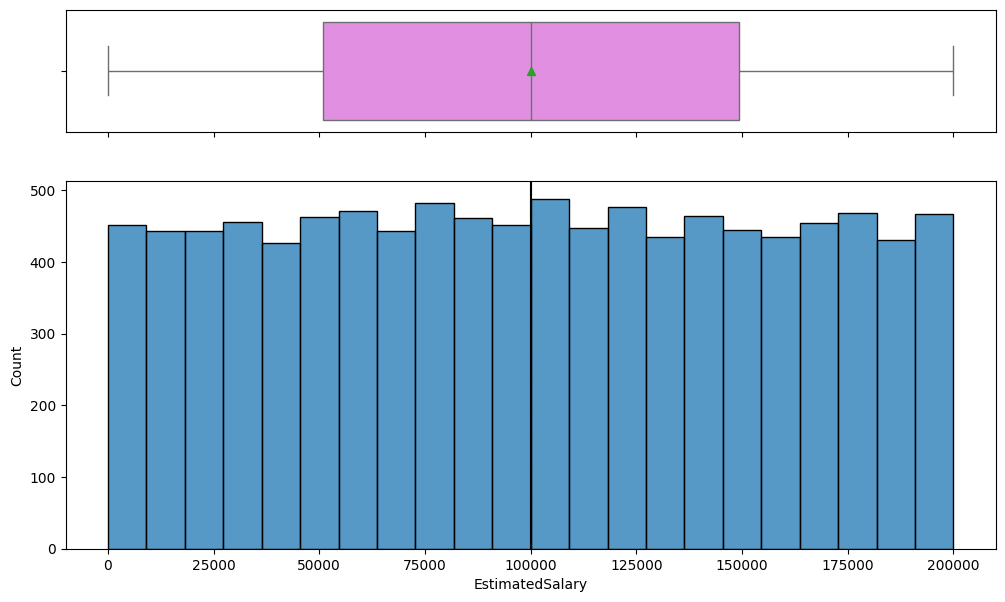

In [ ]:
histogram_boxplot(df,'EstimatedSalary')

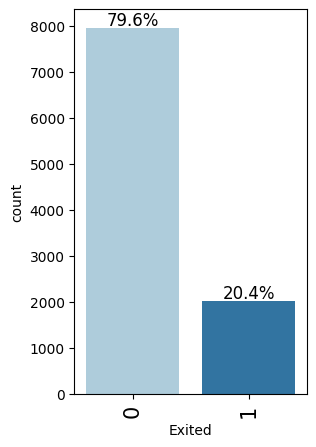

In [ ]:
labeled_barplot(df, "Exited", perc=True)

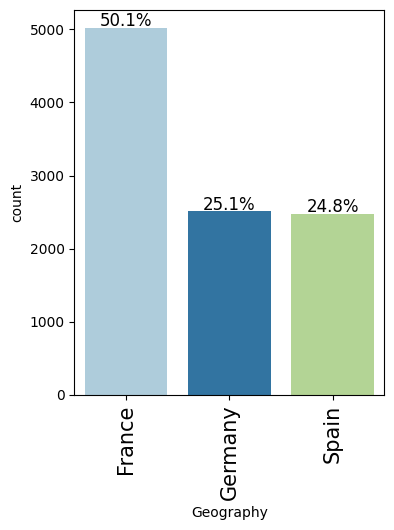

In [ ]:
labeled_barplot(df, "Geography", perc=True)

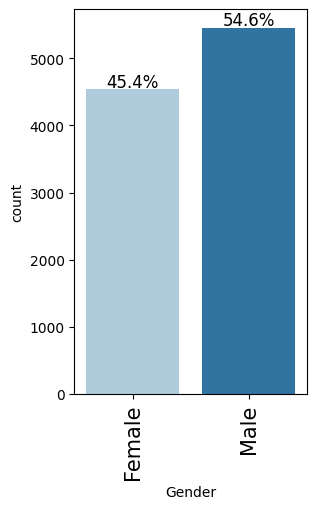

In [ ]:
labeled_barplot(df, "Gender", perc=True)

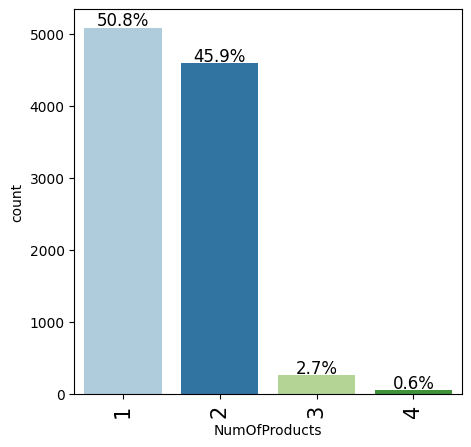

In [ ]:
labeled_barplot(df, "NumOfProducts", perc=True)

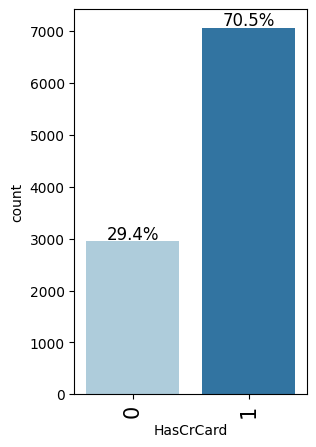

In [ ]:
labeled_barplot(df, "HasCrCard", perc=True)

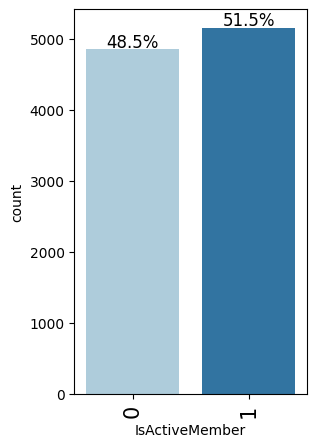

In [ ]:
labeled_barplot(df, "IsActiveMember", perc=True)

### Summary of Univariate Analysis

* Credit Score: The distribution is approximately normal, centered around 650, with a few outliers on the lower end (below 400).
* Age: The distribution is right-skewed, with most customers between 30 and 40 years, but there are some significant outliers above 60 years.
* Balance: A large portion of customers have a 0 balance, while the rest are spread across a range up to 250,000.
* Estimated Salary: The distribution appears uniform, meaning salary is evenly spread among customers.
* Exited (Churn Rate): About 20.4% of customers have churned, while 79.6% have stayed, confirming an imbalanced dataset.
* Geography: 50.1% of customers are from France, 25.1% from Germany, and 24.8% from Spain, indicating a relatively balanced distribution between the three countries.
* Gender: A binary distribution with males being the majority (54.6%) compared to females (45.4%)
* Number of Products: The majority of customers have 1 product (50.8%) or 2 products (45.9%), while having 3 products (2.7%) or 4 products (0.6%) is much less common
* Credit Card Status: The majority of customers (70.5%) have a credit card with the bank (HasCrCard=1), while 29.4% do not have a credit card
* Active Membership: The distribution is nearly balanced, with slightly more active members (51.5%) compared to inactive members (48.5%)

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "NumOfProducts", "HasCrCard", "IsActiveMember"]

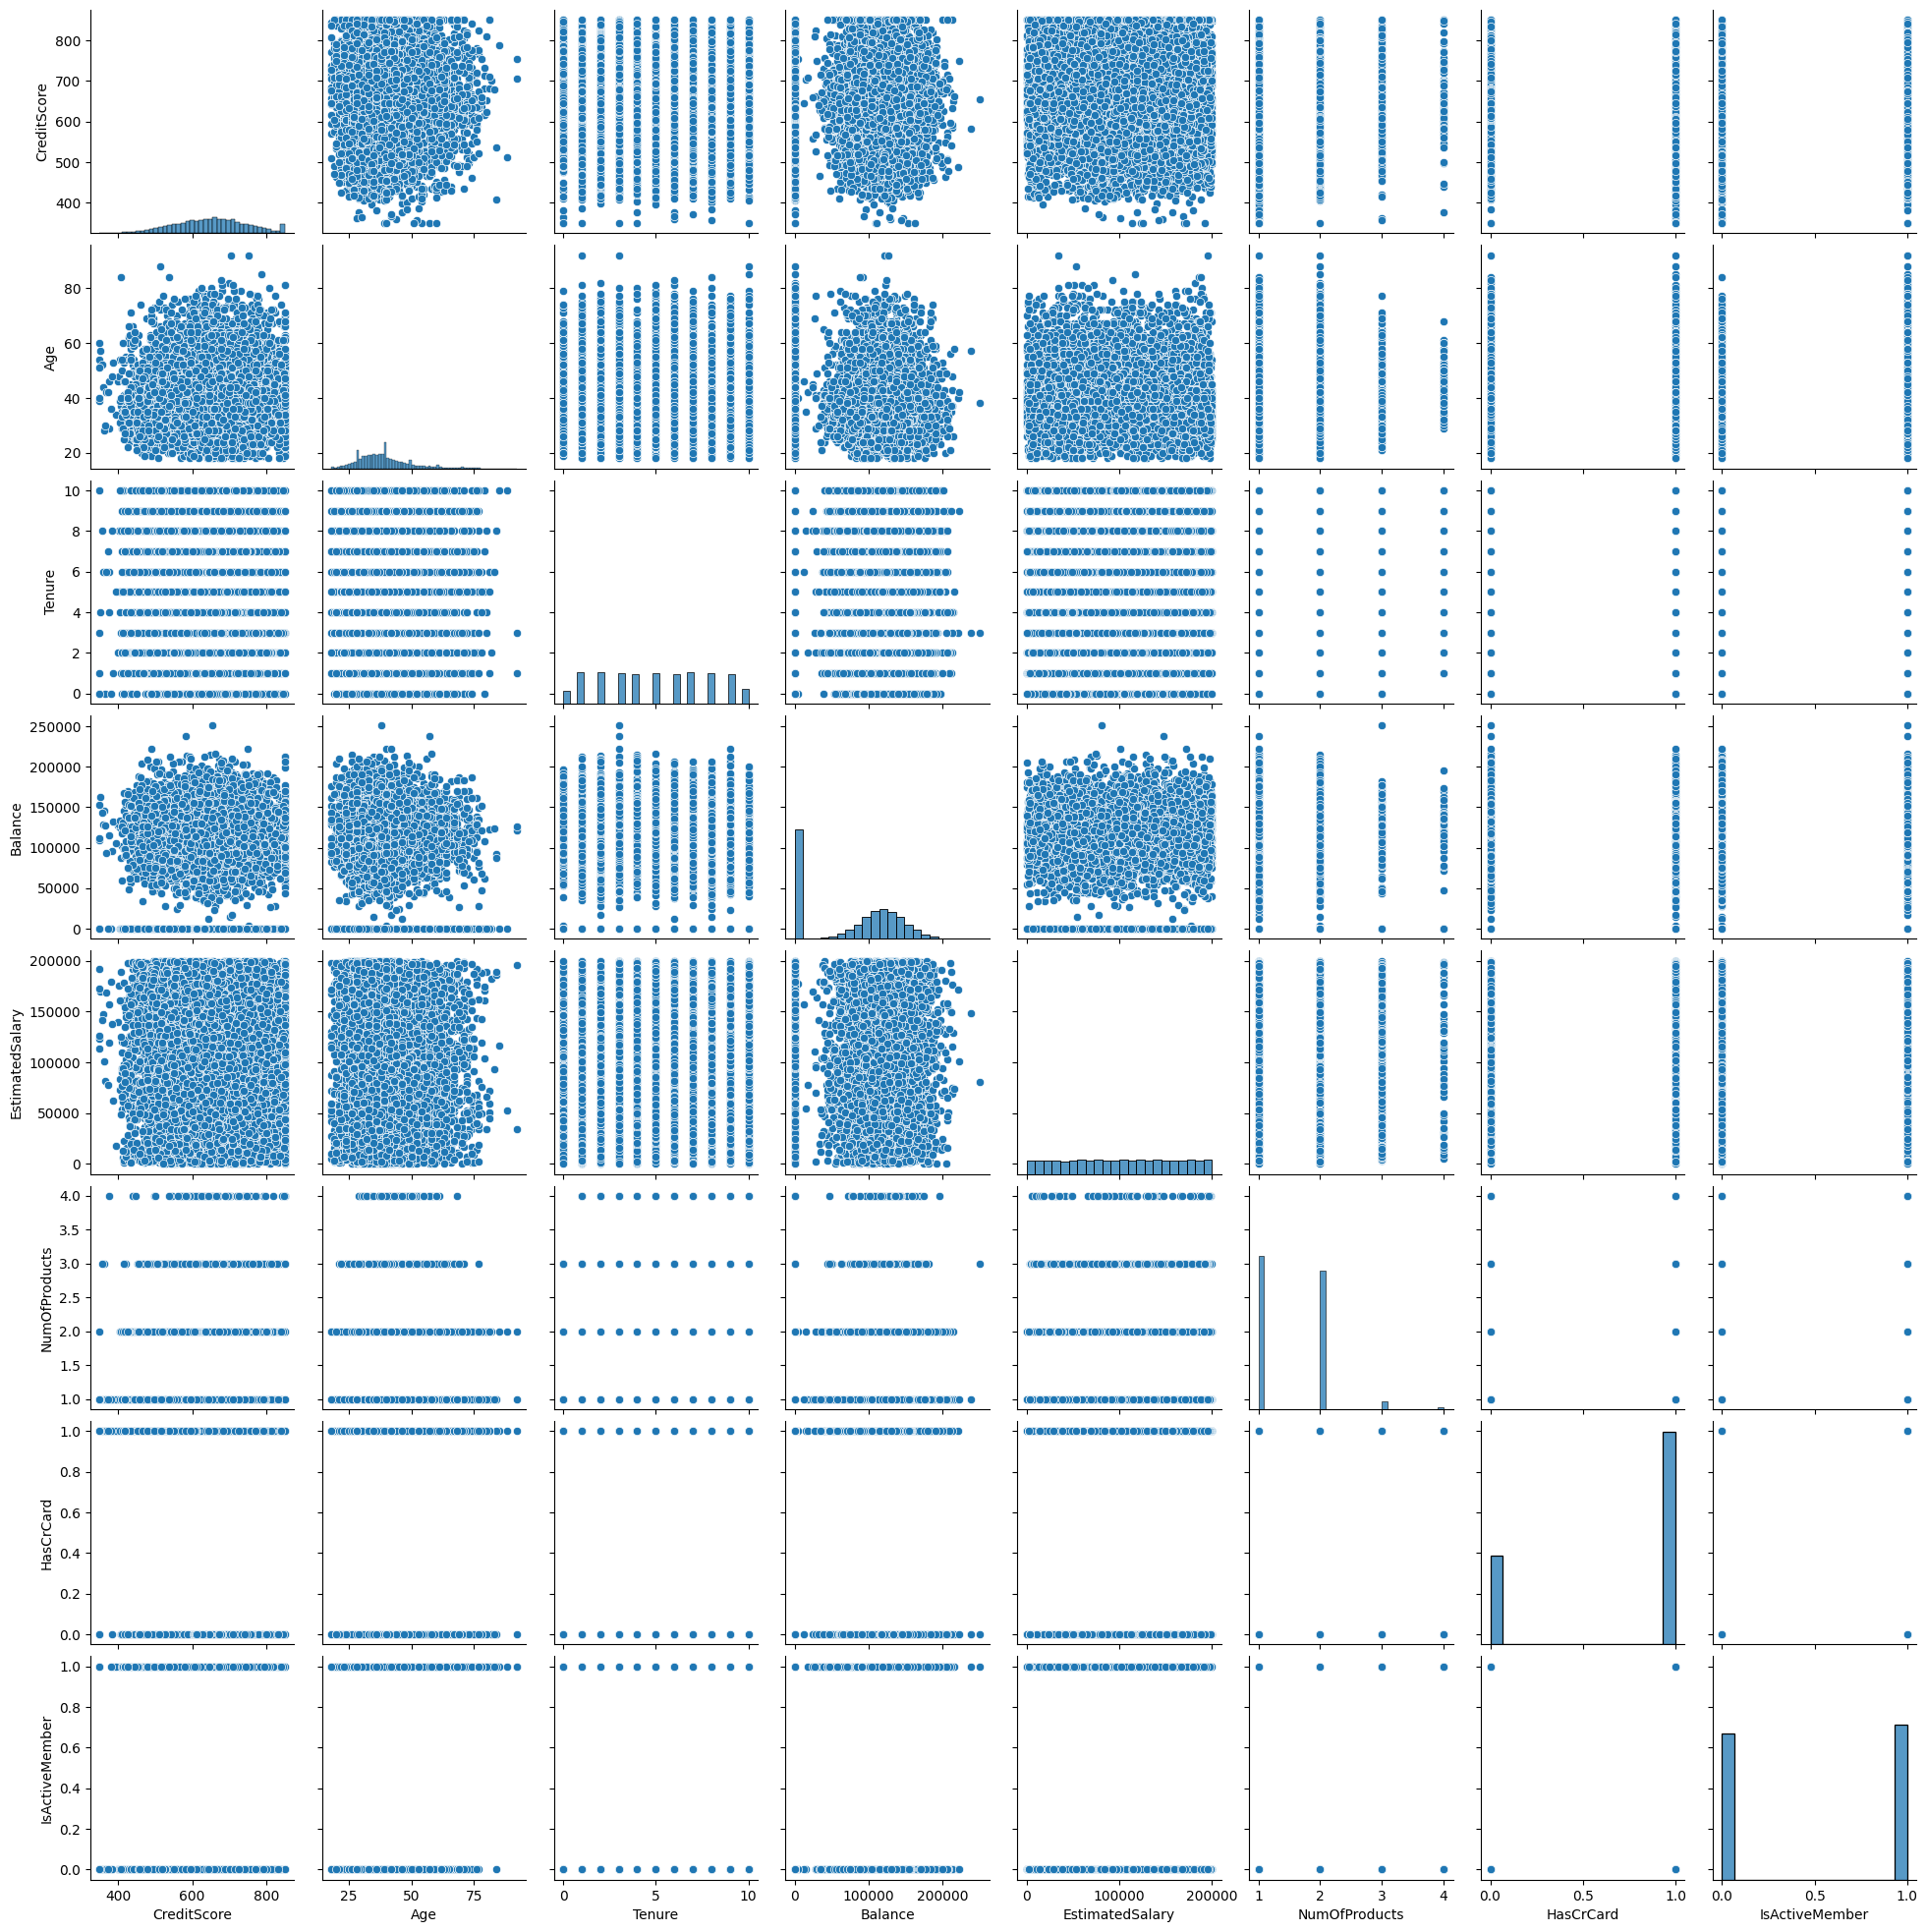

In [ ]:
sns.pairplot(df[numerical_columns])

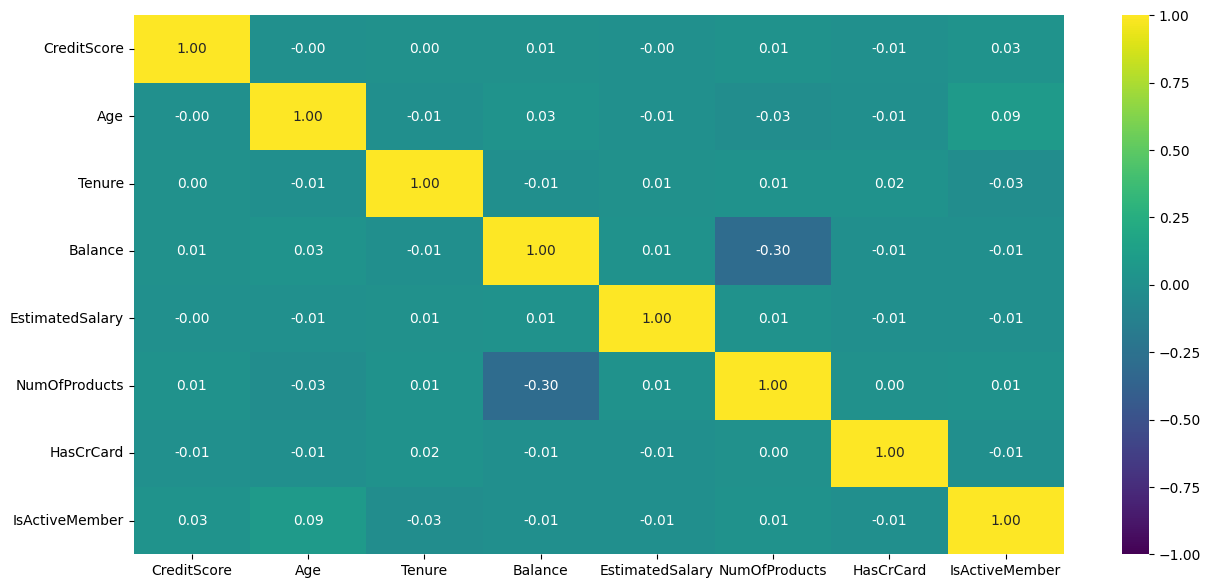

In [ ]:
# Heat Map for all the numberical features in the dataset

plt.figure(figsize=(15, 7))
sns.heatmap(df[numerical_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis")
plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


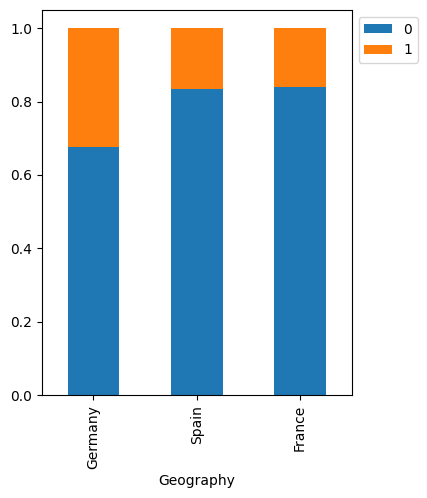

In [ ]:
stacked_barplot(df, "Geography", "Exited" )

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


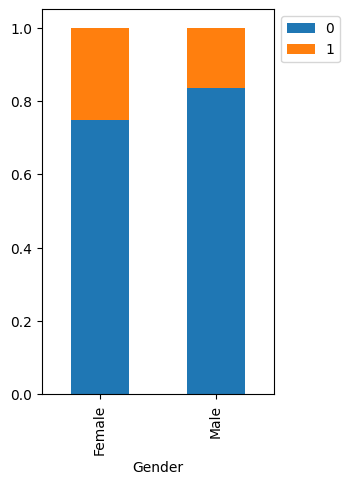

In [ ]:
stacked_barplot(df, "Gender", "Exited" )

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


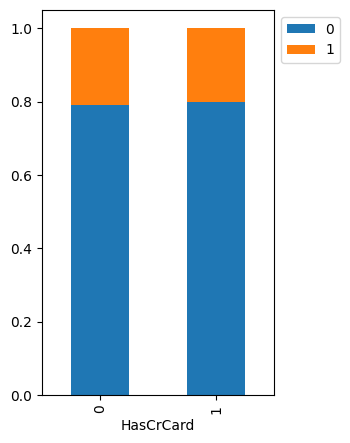

In [ ]:
stacked_barplot(df, "HasCrCard", "Exited" )

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


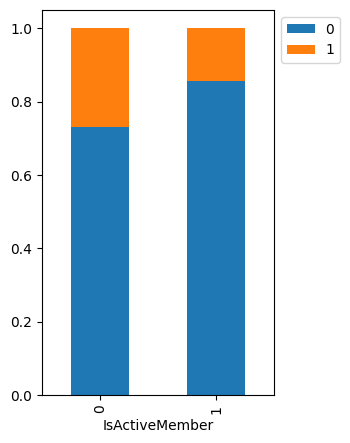

In [ ]:
stacked_barplot(df, "IsActiveMember", "Exited" )

Text(0.5, 1.0, 'EstimatedSalary by Churn')

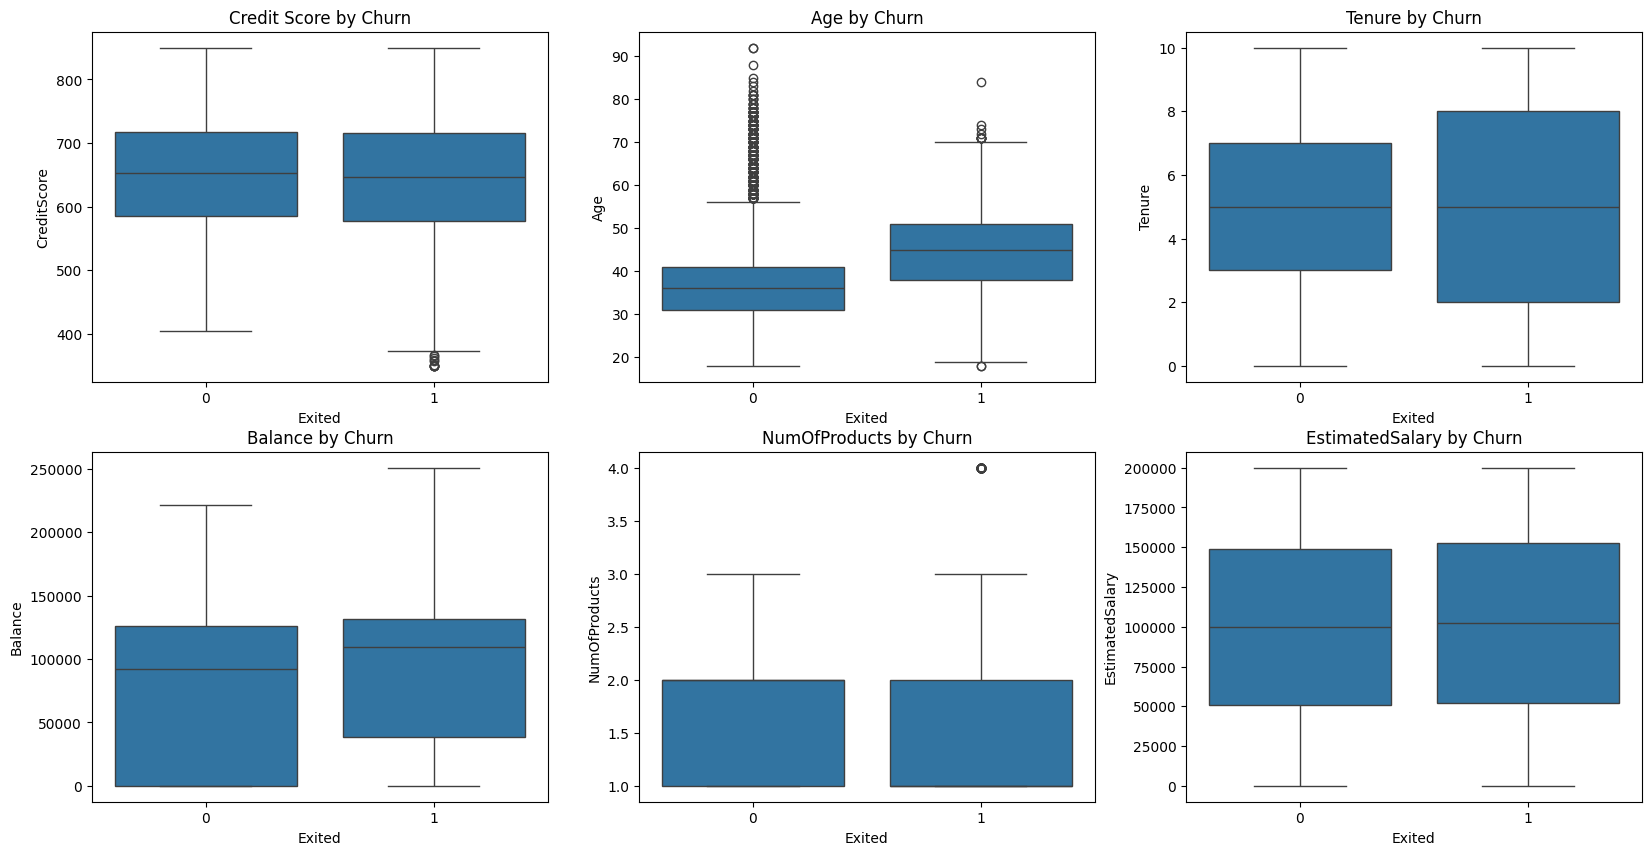

In [ ]:
# As there is not much corelation between the features, the next set of grpahs are drawn in a single cell
# Creating subplots arranged in rows with 3 plots each

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
sns.boxplot(y='CreditScore', x='Exited', data=df)
plt.title('Credit Score by Churn')

plt.subplot(2, 3, 2)
sns.boxplot(y='Age', x='Exited', data=df)
plt.title('Age by Churn')

plt.subplot(2, 3, 3)
sns.boxplot(y='Tenure', x='Exited', data=df)
plt.title('Tenure by Churn')

plt.subplot(2, 3, 4)
sns.boxplot(y='Balance', x='Exited', data=df)
plt.title('Balance by Churn')

plt.subplot(2, 3, 5)
sns.boxplot(y='NumOfProducts', x='Exited', data=df)
plt.title('NumOfProducts by Churn')

plt.subplot(2, 3, 6)
sns.boxplot(y='EstimatedSalary', x='Exited', data=df)
plt.title('EstimatedSalary by Churn')

### Summary of Bivariate Analysis

* Weak to No Correlations: Most variables show very weak correlations (close to 0) with each other, indicating that most features are independent of one another
* A moderate negative correlation (-0.30) between Balance and NumOfProducts. This suggests that customers with higher balances tend to have fewer products, or vice versa
* Age has a very slight positive correlation (0.09) with IsActiveMember
* Age and Tenure: These two variables might be associated with churn, with younger customers and those with longer tenures potentially being more likely to churn.
* Credit Score and NumOfProducts: While there are slight differences in the distributions, their relationship with churn is less clear and requires further investigation.
* Balance and EstimatedSalary: These variables don't show a strong visual relationship with churn based on these box plots.

* The correlation matrix suggests that most customer characteristics and behaviors are relatively independent of each other

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Create dummy variables for categorical columns, i.e., columns that contain non-numeric data. Based on your dataset, the categorical columns are:

* Geography (3 unique values: France, Germany, Spain)
* Gender (2 unique values: Male, Female)

In [ ]:
# List of categorical columns to convert into dummy variables
categorical_cols = ["Geography", "Gender"]

# Create dummy variables
df_encoded= pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype='int')

df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Train-validation-test Split

In [ ]:
#Seperate the target feature from all other features
X = df_encoded.drop(['Exited'],axis=1)
y = df_encoded['Exited']

In [ ]:
# Split the data in Training, Validation and Test data

#Print Original size
print(f"Original set: {X.shape}\n")

# Split into main-training (80%) and test set (20%)
X_train_main, X_test, y_train_main, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Split the main-training into Train and Val - 80:20
X_train, X_val, y_train, y_val = train_test_split(X_train_main, y_train_main, test_size=0.2, random_state=1, stratify=y_train_main)

print("Summary of the data Split:\n")
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")
print(f"Training target: {y_train.shape}, Validation target: {y_val.shape}, Test target: {y_test.shape}")
print("Percentage : 64%, 16%, 20%" )

Original set: (10000, 11)

Summary of the data Split:

Training set: (6400, 11), Validation set: (1600, 11), Test set: (2000, 11)
Training target: (6400,), Validation target: (1600,), Test target: (2000,)
Percentage : 64%, 16%, 20%


### Data Normalization

**Scaling the data:**
* Different feature ranges (e.g., Balance vs. NumOfProducts) can cause issues in model training.
* StandardScaler centers data around zero with unit variance, which helps with gradient-based algorithms like neural networks.
* Scaling only numerical columns ensures that categorical variables (e.g., dummy variables like Geography_Germany, Gender_Male) are not altered.

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

X_train.head()
X_val.head()
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4466,-2.452448,-0.381915,-1.026544,-1.212523,0.796050,0.649543,0.958066,-0.686197,0,1,1
3754,-1.192540,-0.381915,1.033841,0.690558,-0.912441,0.649543,0.958066,0.611309,0,1,1
9601,0.088023,-0.572048,0.690443,0.225938,-0.912441,0.649543,-1.043770,0.628769,0,0,0
9758,-0.975670,0.378617,-0.339749,0.800926,-0.912441,0.649543,0.958066,-0.444630,1,0,0
8577,1.069099,2.470081,-1.369941,0.965592,-0.912441,0.649543,0.958066,0.367567,1,0,1


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for
this business scenario.

**Answer:**
In this bank churn project, the goal is to predict whether a customer will leave (Exited = 1) or stay (Exited = 0). Choosing the right evaluation metric depends on the business impact of "False Positives and "False Negatives".

**False Positive (FP) :** Predicts churn but Customer stays

* The bank may waste resources offering unnecessary retention incentives.
Not ideal, but less damaging than false negatives.

**False Negative (FN):** Predicts customer will stay but they leave

* The bank loses a valuable customer without taking preventive action.
This results in lost revenue, decreased market share, and potential brand damage.
More costly than false positives in this case.

Thus, minimizing False Negatives is more important than False Positives.

Metric Choose:
* Recall is choosen as Primary metric over Precision.
* F1-Score can also be used as a secondary metric to balance between Precision & Recall


In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Class Weight:** Since the dataset is imbalanced i.e about 80% Class 0, 20% Class 1, adding Class weighting helps the model give more importance to the minority class, improve recall and help reduce false negatives

We can also code using this:
```
# from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced',
                                   classes=np.unique(y_train),
                                   y=y_train)

class_weights = dict(zip(np.unique(y_train), class_weights))
```



In [ ]:
cw = (y_train.shape[0]) / (np.bincount(y_train) * len(np.unique(y_train)))
class_weights = dict(enumerate(cw))
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

### Neural Network with SGD Optimizer

* As this is a binary classification problem, Sigmoid activation function is used in the output layer. If it was multi-class, then Softmax activation would have made sense.

In [ ]:
#Clear out the memory
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

training_metric_df = pd.DataFrame(columns=["recall"])
validation_metric_df = pd.DataFrame(columns=["recall"])

# Input dimensions (Number of features in X_train)
input_dimension = X_train.shape[1]

print(f"Input dimensions: {input_dimension}")

Input dimensions: 11


In [ ]:
# Adding the layers sequentially
model_1 = Sequential()

# Adding the input layer with 128 neurons and relu as activation function
model_1.add(Dense(128, activation='relu', input_dim = input_dimension))

# Adding the hidden layer with 64 neurons and relu as activation function
model_1.add(Dense(64, activation='relu'))

# Adding the hidden layer with 32 neurons and relu as activation function
model_1.add(Dense(32, activation='relu'))

# Output Layer
model_1.add(Dense(1, activation='sigmoid'))

**Compile the Model with SGD Optimizer**

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_1 = model_1.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3186 - f1_score: 0.3389 - loss: 0.7309 - recall: 0.8422 - val_accuracy: 0.5181 - val_f1_score: 0.3385 - val_loss: 0.6935 - val_recall: 0.4110
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6079 - f1_score: 0.3389 - loss: 0.6794 - recall: 0.3364 - val_accuracy: 0.7538 - val_f1_score: 0.3385 - val_loss: 0.6529 - val_recall: 0.0613
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7762 - f1_score: 0.3389 - loss: 0.6416 - recall: 0.0384 - val_accuracy: 0.7931 - val_f1_score: 0.3385 - val_loss: 0.6211 - val_recall: 0.0000e+00
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - f1_score: 0.3389 - loss: 0.6114 - recall: 0.0000e+00 - val_accuracy: 0.7962 - val_f1_score: 0.3385 - val_loss: 0.5949 - val_recall: 0.0000e+00
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7960 - f1_score: 0.3389 - loss: 0.5866 - recall: 0.0000e+00 - val_accuracy: 0.7962 - 

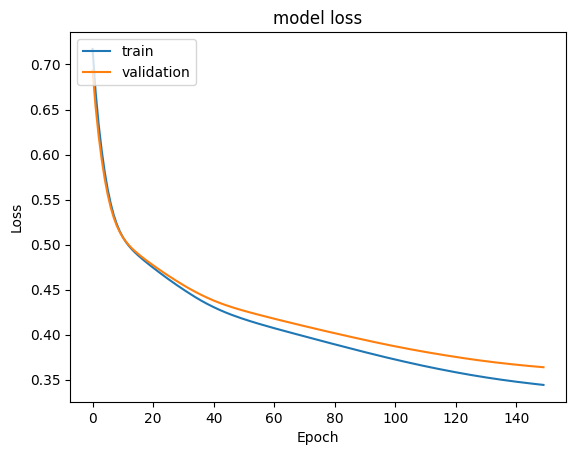

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

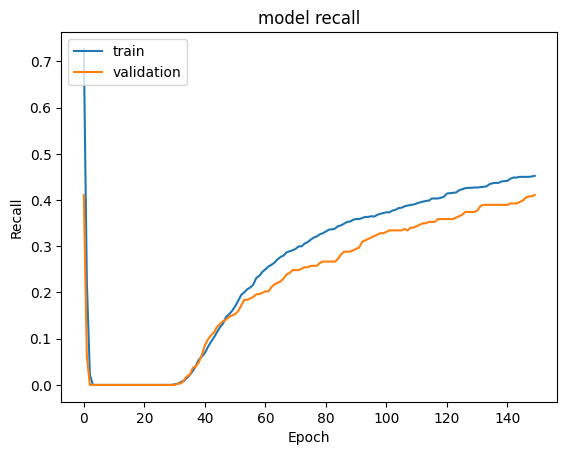

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results on the validation set
y_val_pred_sgd = model_1.predict(X_val)
y_val_pred_sgd = (y_val_pred_sgd > 0.5)
y_val_pred_sgd

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
model_name = "SGD Model"

training_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metric_df.loc[model_name] = recall_score(y_val,y_val_pred_sgd)

In [ ]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      5096
           1       0.77      0.45      0.57      1304

    accuracy                           0.86      6400
   macro avg       0.82      0.71      0.74      6400
weighted avg       0.85      0.86      0.85      6400



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred_sgd)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1274
           1       0.74      0.41      0.53       326

    accuracy                           0.85      1600
   macro avg       0.80      0.69      0.72      1600
weighted avg       0.84      0.85      0.83      1600



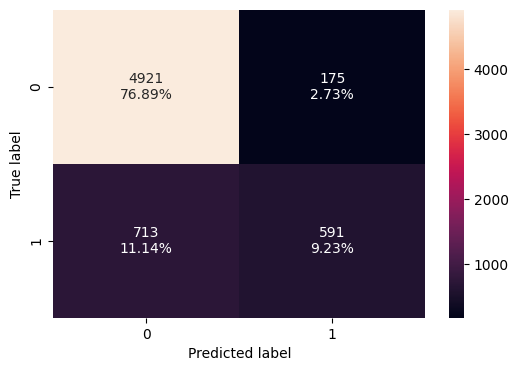

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

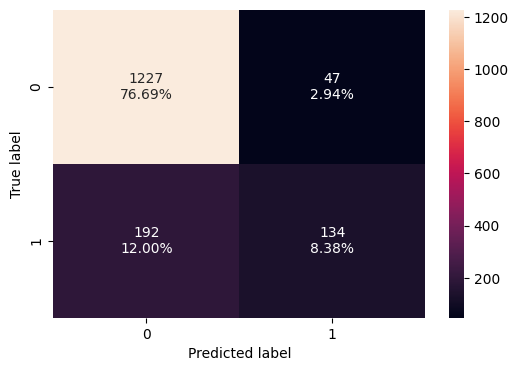

In [ ]:
make_confusion_matrix(y_val, y_val_pred_sgd)

The model_1 is significantly better at identifying class 0 than class 1. Poor recall on class 1 could be problematic. The below section will use different methods to improve the model before finalizing the model to Test.  

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
#Clear out the memory
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Adding the layers sequentially
model_2 = Sequential()

# Adding the input layer with 128 neurons and relu as activation function
model_2.add(Dense(128, activation='relu', input_dim = input_dimension))

# Adding the hidden layer with 64 neurons and relu as activation function
model_2.add(Dense(64, activation='relu'))

# Adding the hidden layer with 32 neurons and relu as activation function
model_2.add(Dense(32, activation='relu'))

model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_2 = model_2.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7544 - f1_score: 0.3389 - loss: 0.5115 - recall: 0.1650 - val_accuracy: 0.8438 - val_f1_score: 0.3385 - val_loss: 0.3786 - val_recall: 0.3313
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8497 - f1_score: 0.3389 - loss: 0.3665 - recall: 0.4002 - val_accuracy: 0.8494 - val_f1_score: 0.3385 - val_loss: 0.3592 - val_recall: 0.4202
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8533 - f1_score: 0.3389 - loss: 0.3523 - recall: 0.4391 - val_accuracy: 0.8487 - val_f1_score: 0.3385 - val_loss: 0.3568 - val_recall: 0.4294
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - f1_score: 0.3389 - loss: 0.3464 - recall: 0.4507 - val_accuracy: 0.8469 - val_f1_score: 0.3385 - val_loss: 0.3562 - val_recall: 0.4294
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8579 - f1_score: 0.3389 - loss: 0.3423 - recall: 0.4652 - val_accuracy: 0.8469 - val_f1_score: 0.

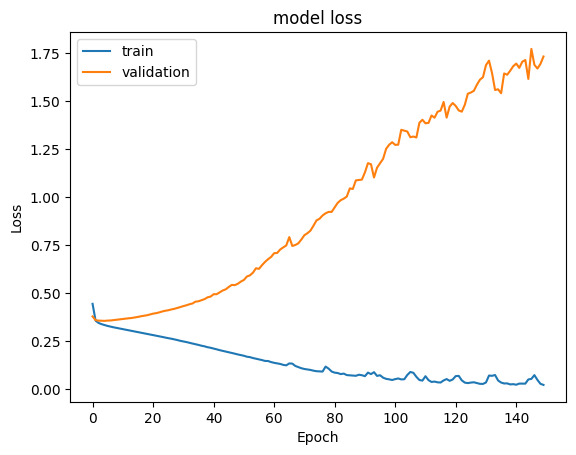

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

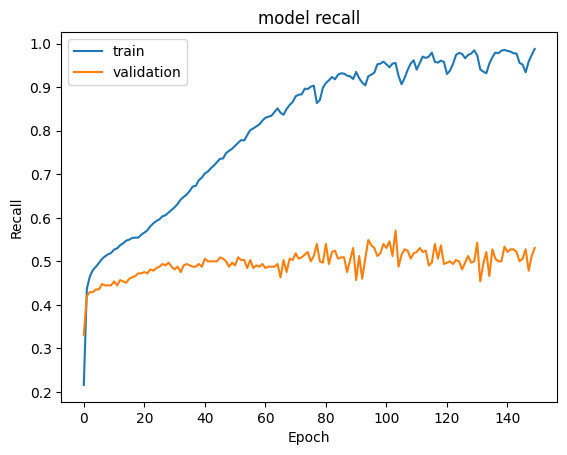

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
#Predicting the results on the validation set
y_val_pred_adam = model_2.predict(X_val)
y_val_pred_adam = (y_val_pred_adam > 0.5)
y_val_pred_adam

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
model_name = "Adam Model"

training_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metric_df.loc[model_name] = recall_score(y_val,y_val_pred_adam)

In [ ]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5096
           1       0.97      0.98      0.98      1304

    accuracy                           0.99      6400
   macro avg       0.98      0.99      0.99      6400
weighted avg       0.99      0.99      0.99      6400



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred_adam)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1274
           1       0.51      0.53      0.52       326

    accuracy                           0.80      1600
   macro avg       0.69      0.70      0.70      1600
weighted avg       0.80      0.80      0.80      1600



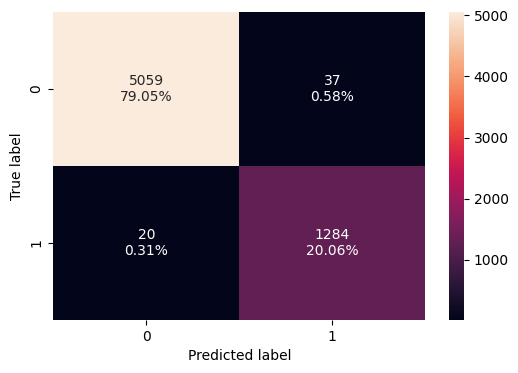

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

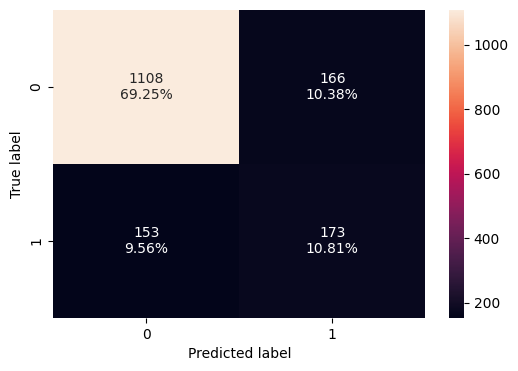

In [ ]:
make_confusion_matrix(y_val, y_val_pred_adam)

### Neural Network with Adam Optimizer and Dropout

In [ ]:
#Clear out the memory
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Adding the layers sequentially
model_3 = Sequential()

# Adding the input layer with 128 neurons and relu as activation function
model_3.add(Dense(128, activation='relu', input_dim = input_dimension))
model_3.add(Dropout(0.2))

# Adding the hidden layer with 64 neurons and relu as activation function
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.2))

# Adding the hidden layer with 32 neurons and relu as activation function
model_3.add(Dense(32, activation='relu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_3 = model_3.fit(X_train, y_train, epochs=150, class_weight = class_weights, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6002 - f1_score: 0.3389 - loss: 0.6285 - recall: 0.7265 - val_accuracy: 0.7538 - val_f1_score: 0.3385 - val_loss: 0.5315 - val_recall: 0.7515
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7405 - f1_score: 0.3389 - loss: 0.5389 - recall: 0.7259 - val_accuracy: 0.7738 - val_f1_score: 0.3385 - val_loss: 0.4955 - val_recall: 0.7699
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7632 - f1_score: 0.3389 - loss: 0.5060 - recall: 0.7446 - val_accuracy: 0.7994 - val_f1_score: 0.3385 - val_loss: 0.4690 - val_recall: 0.7331
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7780 - f1_score: 0.3389 - loss: 0.4980 - recall: 0.7327 - val_accuracy: 0.8062 - val_f1_score: 0.3385 - val_loss: 0.4602 - val_recall: 0.7055
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7827 - f1_score: 0.3389 - loss: 0.4949 - recall: 0.7406 - val_accuracy: 0.7987 - val_f1_score: 0

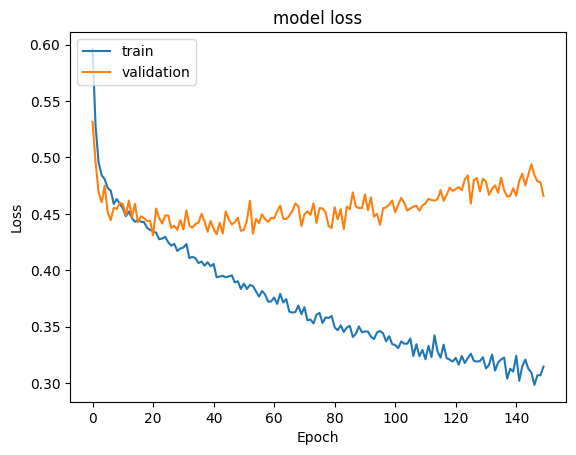

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

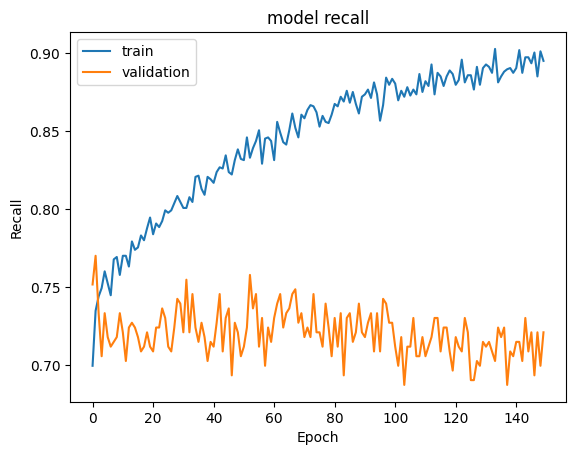

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_3.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
#Predicting the results on the validation set
y_val_pred_adamdrop = model_3.predict(X_val)
y_val_pred_adamdrop = (y_val_pred_adamdrop > 0.5)
y_val_pred_adamdrop

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
model_name = "Adam Model with Dropout"

training_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metric_df.loc[model_name] = recall_score(y_val,y_val_pred_adamdrop)

In [ ]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      5096
           1       0.65      0.96      0.77      1304

    accuracy                           0.89      6400
   macro avg       0.82      0.91      0.85      6400
weighted avg       0.92      0.89      0.89      6400



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred_adamdrop)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1274
           1       0.48      0.72      0.58       326

    accuracy                           0.79      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.79      0.80      1600



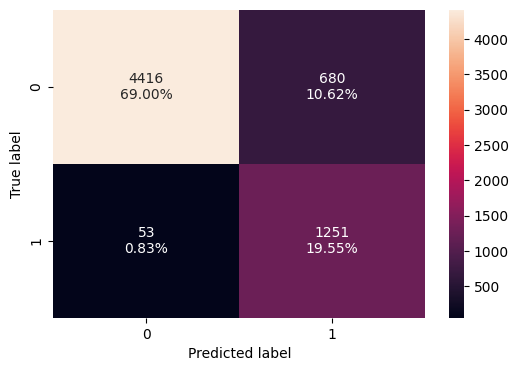

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

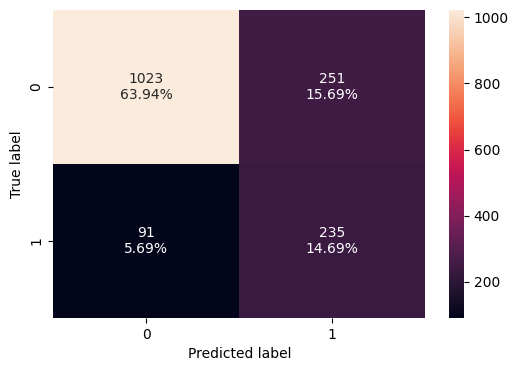

In [ ]:
make_confusion_matrix(y_val, y_val_pred_adamdrop)

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
#Clear out the memory
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
sm  = SMOTE(random_state=42)

print('Before UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

Before UpSampling, the shape of train_X: (6400, 11)
Before UpSampling, the shape of train_y: (6400,) 

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [ ]:
# Adding the layers sequentially
model_4 = Sequential()

# Adding the input layer with 128 neurons and relu as activation function
model_4.add(Dense(128, activation='relu', input_dim = input_dimension))

# Adding the hidden layer with 64 neurons and relu as activation function
model_4.add(Dense(64, activation='relu'))

# Adding the hidden layer with 32 neurons and relu as activation function
model_4.add(Dense(32, activation='relu'))

model_4.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_4 = model_4.fit(X_train_smote, y_train_smote, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5077 - f1_score: 0.6645 - loss: 0.6949 - recall: 0.9209 - val_accuracy: 0.2763 - val_f1_score: 0.3385 - val_loss: 0.7380 - val_recall: 0.8773
Epoch 2/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5254 - f1_score: 0.6645 - loss: 0.6888 - recall: 0.9127 - val_accuracy: 0.3144 - val_f1_score: 0.3385 - val_loss: 0.7288 - val_recall: 0.8681
Epoch 3/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5516 - f1_score: 0.6645 - loss: 0.6832 - recall: 0.9035 - val_accuracy: 0.3613 - val_f1_score: 0.3385 - val_loss: 0.7215 - val_recall: 0.8466
Epoch 4/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5738 - f1_score: 0.6645 - loss: 0.6778 - recall: 0.8925 - val_accuracy: 0.4112 - val_f1_score: 0.3385 - val_loss: 0.7153 - val_recall: 0.8344
Epoch 5/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6056 - f1_score: 0.6645 - loss: 0.6725 - recall: 0.8801 - val_accuracy: 0.4469 - val_f1_score: 0.

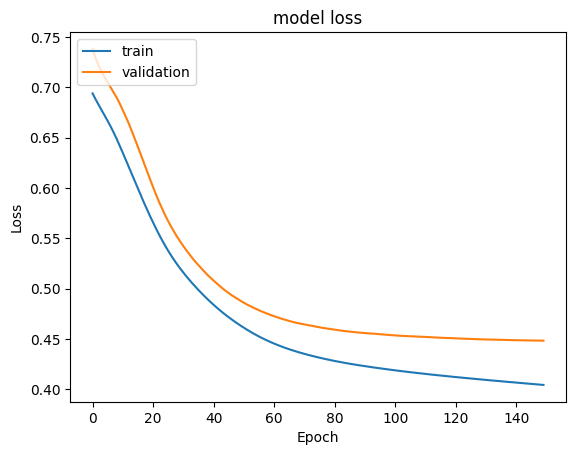

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

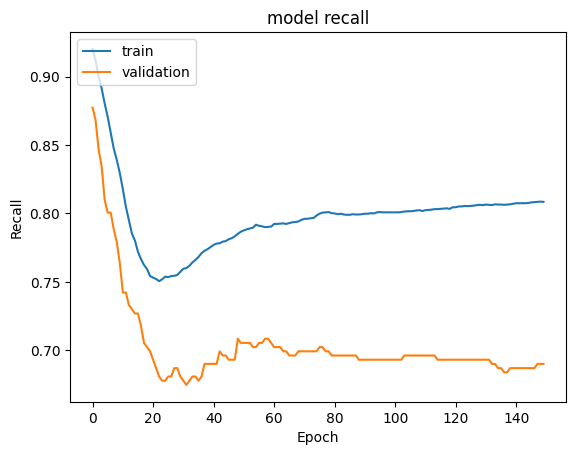

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
#Predicting the results on the validation set
y_val_pred_sgdsmote = model_4.predict(X_val)
y_val_pred_sgdsmote = (y_val_pred_sgdsmote > 0.5)
y_val_pred_sgdsmote

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
model_name = "SGD with SMOTE"

training_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metric_df.loc[model_name] = recall_score(y_val,y_val_pred_sgdsmote)

In [ ]:
#Classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      5096
           1       0.82      0.81      0.81      5096

    accuracy                           0.81     10192
   macro avg       0.81      0.81      0.81     10192
weighted avg       0.81      0.81      0.81     10192



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred_sgdsmote)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1274
           1       0.48      0.69      0.57       326

    accuracy                           0.79      1600
   macro avg       0.70      0.75      0.71      1600
weighted avg       0.82      0.79      0.80      1600



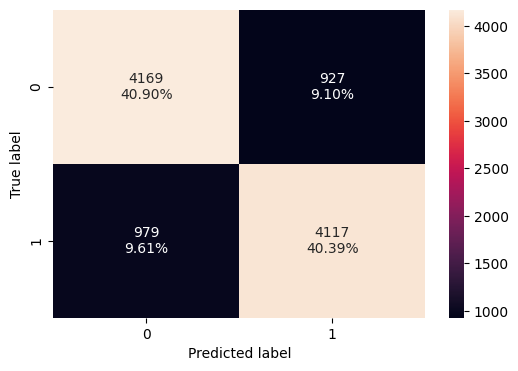

In [ ]:
make_confusion_matrix(y_train_smote, y_train_pred)

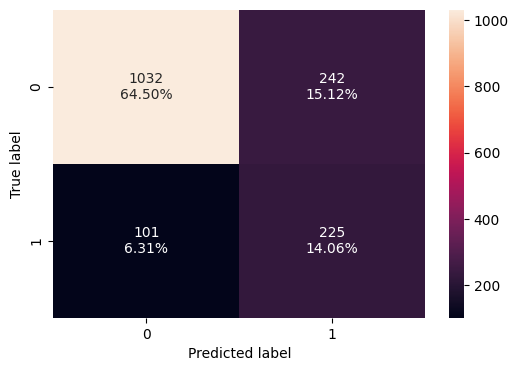

In [ ]:
make_confusion_matrix(y_val, y_val_pred_sgdsmote)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
#Clear out the memory
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
sm  = SMOTE(random_state=42)

print('Before UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

Before UpSampling, the shape of train_X: (6400, 11)
Before UpSampling, the shape of train_y: (6400,) 

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [ ]:
# Adding the layers sequentially
model_5 = Sequential()

# Adding the input layer with 128 neurons and relu as activation function
model_5.add(Dense(128, activation='relu', input_dim = input_dimension))

# Adding the hidden layer with 64 neurons and relu as activation function
model_5.add(Dense(64, activation='relu'))

# Adding the hidden layer with 32 neurons and relu as activation function
model_5.add(Dense(32, activation='relu'))

model_5.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_5 = model_5.fit(X_train_smote, y_train_smote, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7084 - f1_score: 0.6645 - loss: 0.5519 - recall: 0.7610 - val_accuracy: 0.7887 - val_f1_score: 0.3385 - val_loss: 0.4496 - val_recall: 0.6748
Epoch 2/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7987 - f1_score: 0.6645 - loss: 0.4278 - recall: 0.7941 - val_accuracy: 0.7806 - val_f1_score: 0.3385 - val_loss: 0.4550 - val_recall: 0.6779
Epoch 3/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8095 - f1_score: 0.6645 - loss: 0.4100 - recall: 0.8058 - val_accuracy: 0.7806 - val_f1_score: 0.3385 - val_loss: 0.4536 - val_recall: 0.6840
Epoch 4/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8172 - f1_score: 0.6645 - loss: 0.3971 - recall: 0.8161 - val_accuracy: 0.7844 - val_f1_score: 0.3385 - val_loss: 0.4519 - val_recall: 0.6871
Epoch 5/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8211 - f1_score: 0.6645 - loss: 0.3861 - recall: 0.8220 - val_accuracy: 0.7844 - val_f1_score: 0.

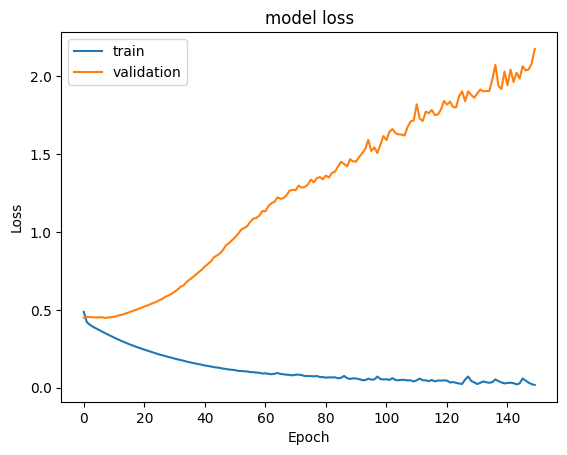

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

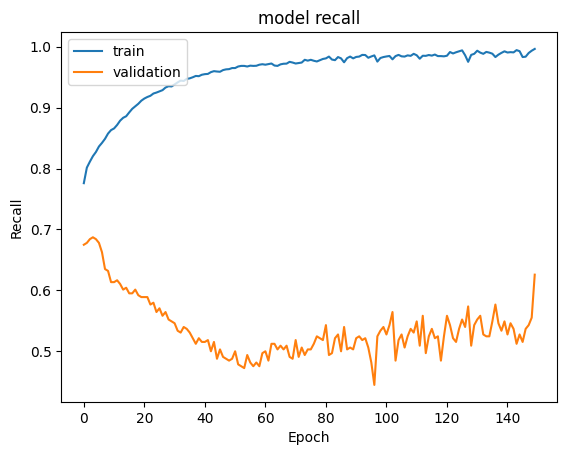

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_5.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
#Predicting the results on the validation set
y_val_pred_adamsmote = model_5.predict(X_val)
y_val_pred_adamsmote = (y_val_pred_adamsmote > 0.5)
y_val_pred_adamsmote

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "Adam with SMOTE"

training_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metric_df.loc[model_name] = recall_score(y_val,y_val_pred_adamsmote)

In [ ]:
#Classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5096
           1       0.98      1.00      0.99      5096

    accuracy                           0.99     10192
   macro avg       0.99      0.99      0.99     10192
weighted avg       0.99      0.99      0.99     10192



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred_adamsmote)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.80      0.85      1274
           1       0.45      0.63      0.52       326

    accuracy                           0.77      1600
   macro avg       0.67      0.71      0.68      1600
weighted avg       0.80      0.77      0.78      1600



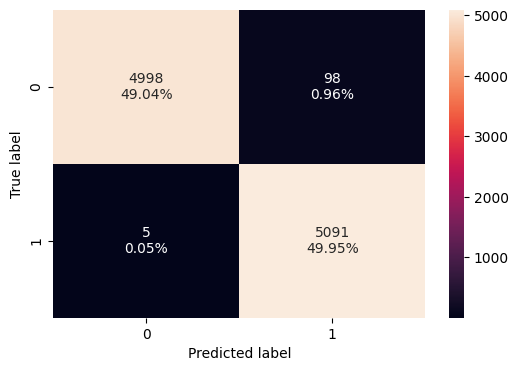

In [ ]:
make_confusion_matrix(y_train_smote, y_train_pred)

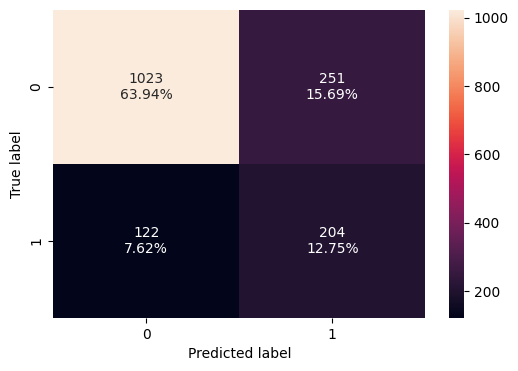

In [ ]:
make_confusion_matrix(y_val, y_val_pred_adamsmote)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
#Clear out the memory
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
sm  = SMOTE(random_state=42)

print('Before UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

Before UpSampling, the shape of train_X: (6400, 11)
Before UpSampling, the shape of train_y: (6400,) 

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [ ]:
# Adding the layers sequentially
model_6 = Sequential()

# Adding the input layer with 128 neurons and relu as activation function
model_6.add(Dense(128, activation='relu', input_dim = input_dimension))

model_6.add(Dropout(0.2))

# Adding the hidden layer with 64 neurons and relu as activation function
model_6.add(Dense(64, activation='relu'))

model_6.add(Dropout(0.2))
# Adding the hidden layer with 32 neurons and relu as activation function
model_6.add(Dense(32, activation='relu'))

model_6.add(Dropout(0.2))

model_6.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_6.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
model_6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_6 = model_6.fit(X_train_smote, y_train_smote, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6772 - f1_score: 0.6645 - loss: 0.5863 - recall: 0.7256 - val_accuracy: 0.7487 - val_f1_score: 0.3385 - val_loss: 0.4986 - val_recall: 0.7331
Epoch 2/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7803 - f1_score: 0.6645 - loss: 0.4642 - recall: 0.7869 - val_accuracy: 0.7694 - val_f1_score: 0.3385 - val_loss: 0.4733 - val_recall: 0.7147
Epoch 3/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7856 - f1_score: 0.6645 - loss: 0.4577 - recall: 0.7777 - val_accuracy: 0.7750 - val_f1_score: 0.3385 - val_loss: 0.4750 - val_recall: 0.7209
Epoch 4/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7959 - f1_score: 0.6645 - loss: 0.4402 - recall: 0.7912 - val_accuracy: 0.7775 - val_f1_score: 0.3385 - val_loss: 0.4621 - val_recall: 0.7086
Epoch 5/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7985 - f1_score: 0.6645 - loss: 0.4333 - recall: 0.8020 - val_accuracy: 0.7906 - val_f1_score: 0.

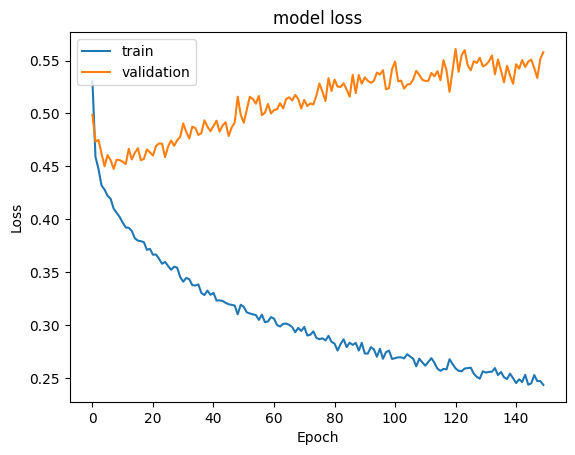

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

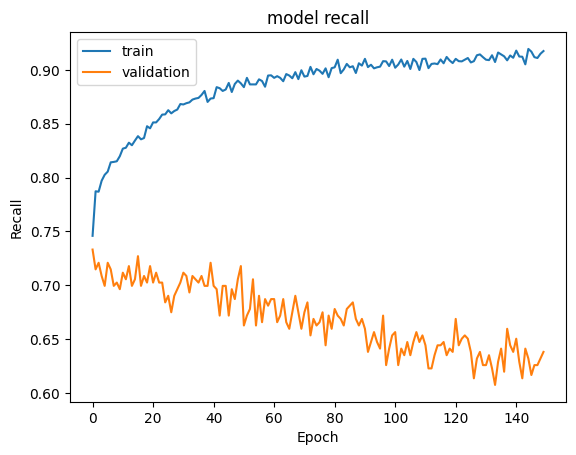

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_6.history['recall'])
plt.plot(history_6.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_6.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
#Predicting the results on the validation set
y_val_pred_adamsmotedropout = model_6.predict(X_val)
y_val_pred_adamsmotedropout = (y_val_pred_adamsmotedropout > 0.5)
y_val_pred_adamsmotedropout

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
model_name = "Adam with SMOTE & Dropout"

training_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metric_df.loc[model_name] = recall_score(y_val,y_val_pred_adamsmotedropout)

In [ ]:
#Classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      5096
           1       0.92      0.97      0.95      5096

    accuracy                           0.94     10192
   macro avg       0.95      0.94      0.94     10192
weighted avg       0.95      0.94      0.94     10192



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred_adamsmotedropout)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1274
           1       0.48      0.64      0.55       326

    accuracy                           0.79      1600
   macro avg       0.69      0.73      0.70      1600
weighted avg       0.81      0.79      0.80      1600



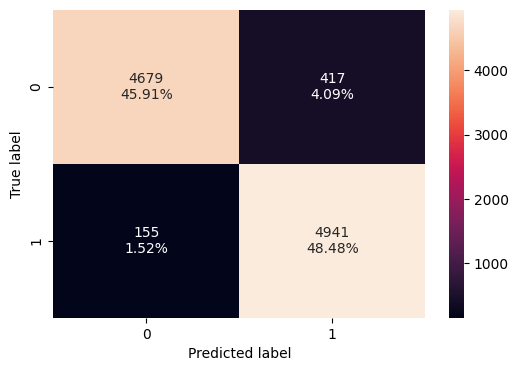

In [ ]:
make_confusion_matrix(y_train_smote, y_train_pred)

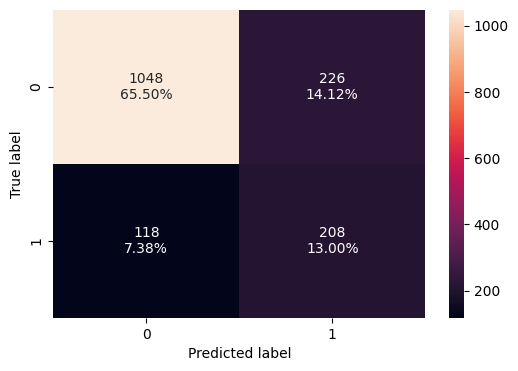

In [ ]:
make_confusion_matrix(y_val, y_val_pred_adamsmotedropout)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout and Learning Rate of 0.0001

In [ ]:
#Clear out the memory
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
sm  = SMOTE(random_state=42)

print('Before UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

Before UpSampling, the shape of train_X: (6400, 11)
Before UpSampling, the shape of train_y: (6400,) 

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [ ]:
# Adding the layers sequentially
model_7 = Sequential()

# Adding the input layer with 128 neurons and relu as activation function
model_7.add(Dense(128, activation='relu', input_dim = input_dimension))

model_7.add(Dropout(0.2))

# Adding the hidden layer with 64 neurons and relu as activation function
model_7.add(Dense(64, activation='relu'))

model_7.add(Dropout(0.2))
# Adding the hidden layer with 32 neurons and relu as activation function
model_7.add(Dense(32, activation='relu'))

model_7.add(Dropout(0.2))

model_7.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_7.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
model_7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_7 = model_7.fit(X_train_smote, y_train_smote, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5715 - f1_score: 0.6645 - loss: 0.6741 - recall: 0.8330 - val_accuracy: 0.6925 - val_f1_score: 0.3385 - val_loss: 0.6148 - val_recall: 0.6871
Epoch 2/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6812 - f1_score: 0.6645 - loss: 0.6003 - recall: 0.7105 - val_accuracy: 0.7356 - val_f1_score: 0.3385 - val_loss: 0.5546 - val_recall: 0.6779
Epoch 3/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7256 - f1_score: 0.6645 - loss: 0.5599 - recall: 0.7238 - val_accuracy: 0.7506 - val_f1_score: 0.3385 - val_loss: 0.5203 - val_recall: 0.6963
Epoch 4/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7416 - f1_score: 0.6645 - loss: 0.5268 - recall: 0.7470 - val_accuracy: 0.7606 - val_f1_score: 0.3385 - val_loss: 0.4966 - val_recall: 0.6963
Epoch 5/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7579 - f1_score: 0.6645 - loss: 0.5099 - recall: 0.7659 - val_accuracy: 0.7663 - val_f1_score: 0.

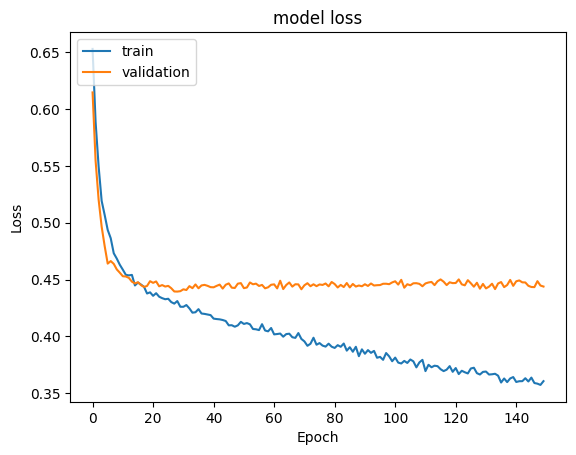

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

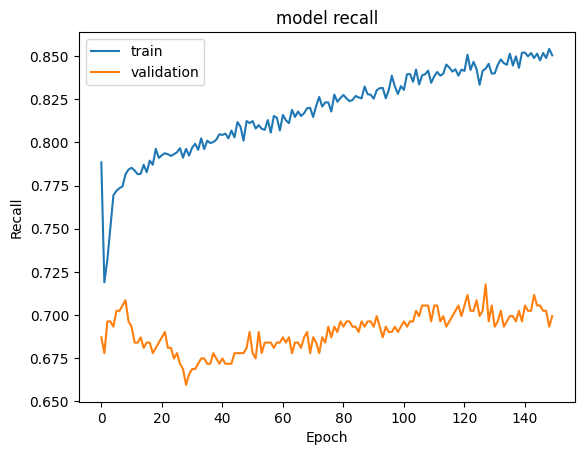

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_7.history['recall'])
plt.plot(history_7.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_7.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
#Predicting the results on the validation set
y_val_pred_adamsmotedropout_lr = model_7.predict(X_val)
y_val_pred_adamsmotedropout_lr = (y_val_pred_adamsmotedropout_lr > 0.5)
y_val_pred_adamsmotedropout_lr

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
model_name = "Adam with SMOTE & Dropout & LR of 0.0001"

training_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metric_df.loc[model_name] = recall_score(y_val,y_val_pred_adamsmotedropout_lr)

In [ ]:
#Classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5096
           1       0.85      0.87      0.86      5096

    accuracy                           0.86     10192
   macro avg       0.86      0.86      0.86     10192
weighted avg       0.86      0.86      0.86     10192



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred_adamsmotedropout_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1274
           1       0.49      0.70      0.58       326

    accuracy                           0.79      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.79      0.81      1600



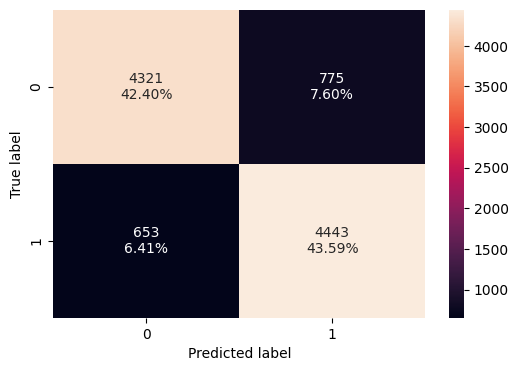

In [ ]:
make_confusion_matrix(y_train_smote, y_train_pred)

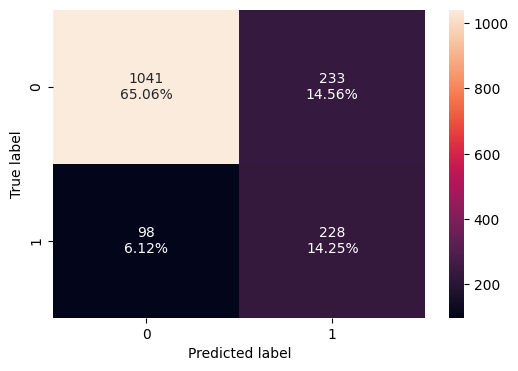

In [ ]:
make_confusion_matrix(y_val, y_val_pred_adamsmotedropout_lr)

### Neural Network with Balanced Data (by applying SMOTE), SGD Optimizer,Dropout and Learning Rate of 0.0001

In [ ]:
#Clear out the memory
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
sm  = SMOTE(random_state=42)

print('Before UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

Before UpSampling, the shape of train_X: (6400, 11)
Before UpSampling, the shape of train_y: (6400,) 

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [ ]:
# Adding the layers sequentially
model_8 = Sequential()

# Adding the input layer with 128 neurons and relu as activation function
model_8.add(Dense(128, activation='relu', input_dim = input_dimension))
model_8.add(Dropout(0.2))
# Adding the hidden layer with 64 neurons and relu as activation function
model_8.add(Dense(64, activation='relu'))
model_8.add(Dropout(0.2))
# Adding the hidden layer with 32 neurons and relu as activation function
model_8.add(Dense(32, activation='relu'))
model_8.add(Dropout(0.2))
model_8.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)
model_8.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
model_8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_8 = model_8.fit(X_train_smote, y_train_smote, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5179 - f1_score: 0.6645 - loss: 0.6982 - recall: 0.8955 - val_accuracy: 0.2881 - val_f1_score: 0.3385 - val_loss: 0.7651 - val_recall: 0.9632
Epoch 2/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5213 - f1_score: 0.6645 - loss: 0.6979 - recall: 0.8985 - val_accuracy: 0.2931 - val_f1_score: 0.3385 - val_loss: 0.7616 - val_recall: 0.9571
Epoch 3/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5185 - f1_score: 0.6645 - loss: 0.6990 - recall: 0.8889 - val_accuracy: 0.2981 - val_f1_score: 0.3385 - val_loss: 0.7581 - val_recall: 0.9571
Epoch 4/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5217 - f1_score: 0.6645 - loss: 0.6956 - recall: 0.8832 - val_accuracy: 0.3025 - val_f1_score: 0.3385 - val_loss: 0.7548 - val_recall: 0.9540
Epoch 5/150
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5272 - f1_score: 0.6645 - loss: 0.6943 - recall: 0.8832 - val_accuracy: 0.3063 - val_f1_score: 0.

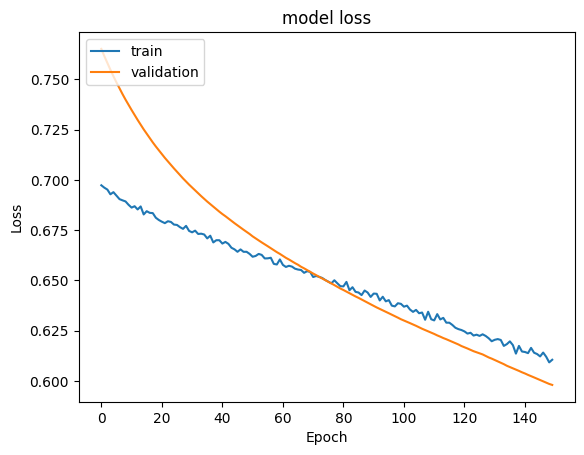

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_8.history['loss'])
plt.plot(history_8.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

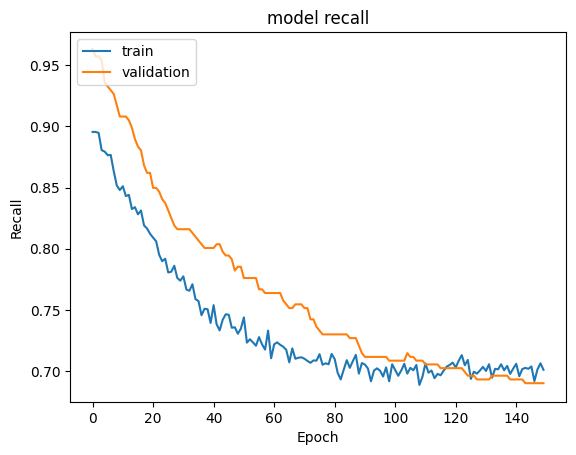

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_8.history['recall'])
plt.plot(history_8.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_8.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
#Predicting the results on the validation set
y_val_pred_sgdsmotedropout_lr = model_8.predict(X_val)
y_val_pred_sgdsmotedropout_lr = (y_val_pred_sgdsmotedropout_lr > 0.5)
y_val_pred_sgdsmotedropout_lr

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
model_name = "SGD with SMOTE & Dropout & LR of 0.0001"

training_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metric_df.loc[model_name] = recall_score(y_val,y_val_pred_sgdsmotedropout_lr)

In [ ]:
#Classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      5096
           1       0.71      0.70      0.71      5096

    accuracy                           0.71     10192
   macro avg       0.71      0.71      0.71     10192
weighted avg       0.71      0.71      0.71     10192



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred_sgdsmotedropout_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1274
           1       0.37      0.69      0.49       326

    accuracy                           0.70      1600
   macro avg       0.64      0.70      0.64      1600
weighted avg       0.79      0.70      0.73      1600



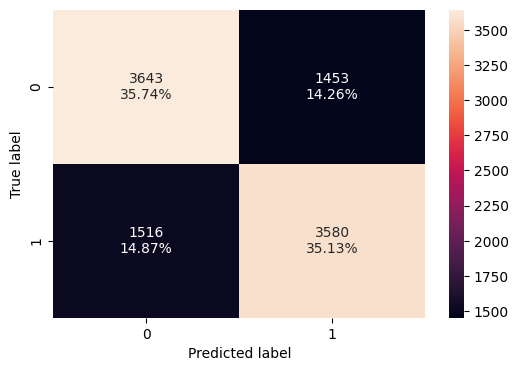

In [ ]:
make_confusion_matrix(y_train_smote, y_train_pred)

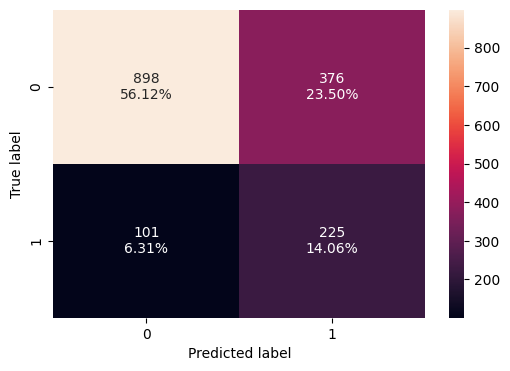

In [ ]:
make_confusion_matrix(y_val, y_val_pred_sgdsmotedropout_lr)

## Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer,Dropout and Learning Rate of 0.0001 with a Balanced Class Weights

In [ ]:
#Clear out the memory
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
sm  = SMOTE(random_state=42)

print('Before UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

Before UpSampling, the shape of train_X: (6400, 11)
Before UpSampling, the shape of train_y: (6400,) 

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [ ]:
# Adding the layers sequentially
model_9 = Sequential()

# Adding the input layer with 128 neurons and relu as activation function
model_9.add(Dense(128, activation='relu', input_dim = input_dimension))
model_9.add(Dropout(0.2))

# Adding the hidden layer with 64 neurons and relu as activation function
model_9.add(Dense(64, activation='relu'))
model_9.add(Dropout(0.2))

# Adding the hidden layer with 32 neurons and relu as activation function
model_9.add(Dense(32, activation='relu'))
model_9.add(Dropout(0.2))

model_9.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_9.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
model_9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_9 = model_9.fit(X_train, y_train, epochs=150, class_weight = class_weights, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2975 - f1_score: 0.3389 - loss: 0.6933 - recall: 0.9017 - val_accuracy: 0.3106 - val_f1_score: 0.3385 - val_loss: 0.7491 - val_recall: 0.9325
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3310 - f1_score: 0.3389 - loss: 0.6892 - recall: 0.8490 - val_accuracy: 0.3512 - val_f1_score: 0.3385 - val_loss: 0.7332 - val_recall: 0.9080
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3783 - f1_score: 0.3389 - loss: 0.6848 - recall: 0.8302 - val_accuracy: 0.3856 - val_f1_score: 0.3385 - val_loss: 0.7213 - val_recall: 0.8865
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3938 - f1_score: 0.3389 - loss: 0.6813 - recall: 0.8082 - val_accuracy: 0.4187 - val_f1_score: 0.3385 - val_loss: 0.7103 - val_recall: 0.8528
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4390 - f1_score: 0.3389 - loss: 0.6711 - recall: 0.8165 - val_accuracy: 0.4469 - val_f1_score: 0.

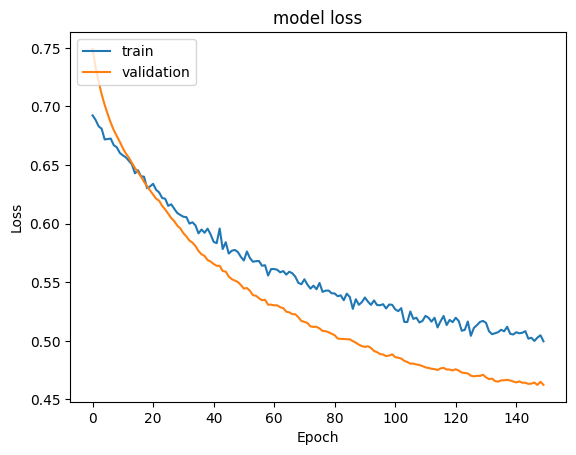

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

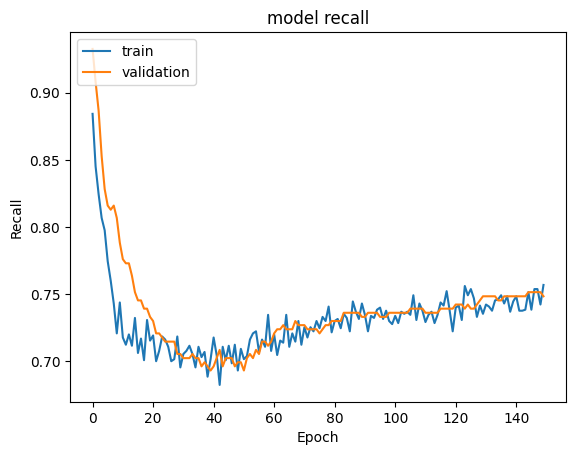

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_9.history['recall'])
plt.plot(history_9.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_8.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
#Predicting the results on the validation set
y_val_pred_adamsmotedropout_lr_classweight = model_9.predict(X_val)
y_val_pred_adamsmotedropout_lr_classweight = (y_val_pred_adamsmotedropout_lr_classweight > 0.5)
y_val_pred_adamsmotedropout_lr_classweight

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
model_name = "Adam with SMOTE & Dropout & LR of 0.0001 & Balanced Class_weight"

training_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metric_df.loc[model_name] = recall_score(y_val,y_val_pred_adamsmotedropout_lr_classweight)

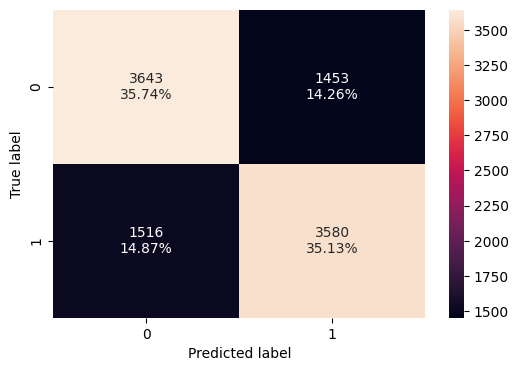

In [ ]:
make_confusion_matrix(y_train_smote, y_train_pred)

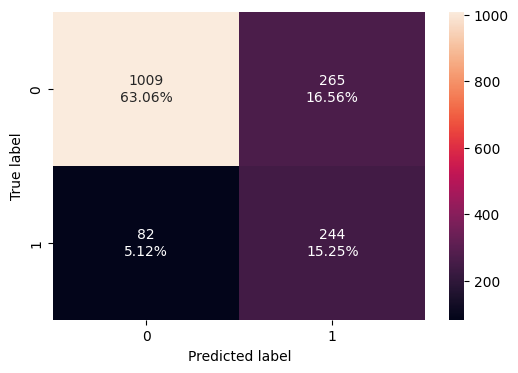

In [ ]:
make_confusion_matrix(y_val, y_val_pred_adamsmotedropout_lr_classweight)

## Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer,Dropout and Learning Rate of 0.0001 with a Balanced Class Weights & Batch Normalization

In [ ]:
#Clear out the memory
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
sm  = SMOTE(random_state=42)
print('Before UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UpSampling, the shape of train_y: {} \n'.format(y_train.shape))
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

Before UpSampling, the shape of train_X: (6400, 11)
Before UpSampling, the shape of train_y: (6400,) 

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [ ]:
# Adding the layers sequentially
model_10 = Sequential()

# Adding the input layer with 128 neurons and relu as activation function
model_10.add(Dense(128, activation='relu', input_dim = input_dimension))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.2))

# Adding the hidden layer with 64 neurons and relu as activation function
model_10.add(Dense(64, activation='relu'))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.2))

# Adding the hidden layer with 32 neurons and relu as activation function
model_10.add(Dense(32, activation='relu'))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.2))

model_10.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_10.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
model_10.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,353 (48.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history_10 = model_10.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4769 - f1_score: 0.3389 - loss: 0.9448 - recall_2: 0.4227 - val_accuracy: 0.5462 - val_f1_score: 0.3385 - val_loss: 0.6838 - val_recall_2: 0.6350
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5760 - f1_score: 0.3389 - loss: 0.7489 - recall_2: 0.5577 - val_accuracy: 0.6844 - val_f1_score: 0.3385 - val_loss: 0.5933 - val_recall_2: 0.5951
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6287 - f1_score: 0.3389 - loss: 0.6786 - recall_2: 0.5458 - val_accuracy: 0.7462 - val_f1_score: 0.3385 - val_loss: 0.5388 - val_recall_2: 0.5982
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6642 - f1_score: 0.3389 - loss: 0.6253 - recall_2: 0.5457 - val_accuracy: 0.7837 - val_f1_score: 0.3385 - val_loss: 0.4994 - val_recall_2: 0.5920
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7014 - f1_score: 0.3389 - loss: 0.5796 - recall_2: 0.5208 - val_accuracy: 0.8037 

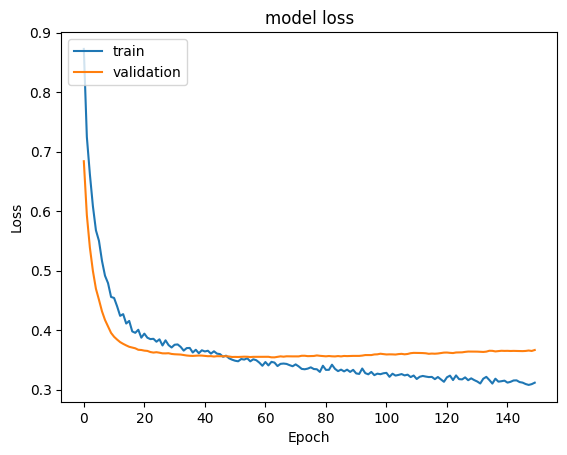

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_10.history['loss'])
plt.plot(history_10.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

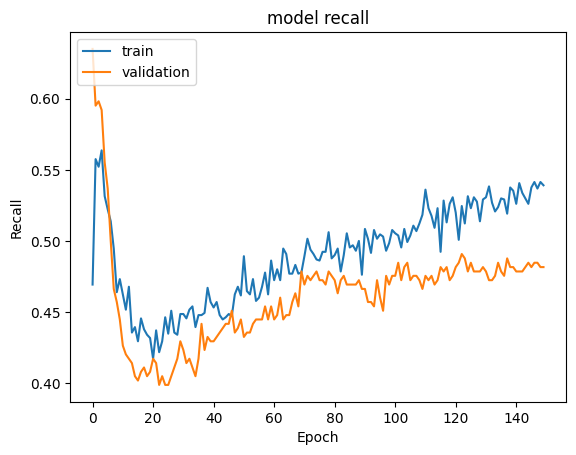

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_10.history['recall_2'])
plt.plot(history_10.history['val_recall_2'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_10.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results on the validation set
y_val_pred_adamsmotedropout_lr_classweight_batch = model_9.predict(X_val)
y_val_pred_adamsmotedropout_lr_classweight_batch = (y_val_pred_adamsmotedropout_lr_classweight_batch > 0.5)
y_val_pred_adamsmotedropout_lr_classweight_batch

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
model_name = "Adam with SMOTE & Dropout & LR of 0.0001 & Balanced Class_weight & Batch Normalized"

training_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metric_df.loc[model_name] = recall_score(y_val,y_val_pred_adamsmotedropout_lr_classweight_batch)

In [ ]:
#lassification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.96      0.80      5096
           1       0.93      0.57      0.71      5096

    accuracy                           0.76     10192
   macro avg       0.81      0.76      0.75     10192
weighted avg       0.81      0.76      0.75     10192



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred_adamsmotedropout_lr_classweight_batch)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1274
           1       0.48      0.75      0.58       326

    accuracy                           0.78      1600
   macro avg       0.70      0.77      0.72      1600
weighted avg       0.83      0.78      0.80      1600



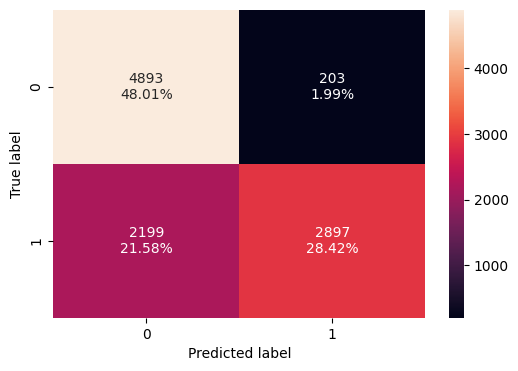

In [ ]:
make_confusion_matrix(y_train_smote, y_train_pred)

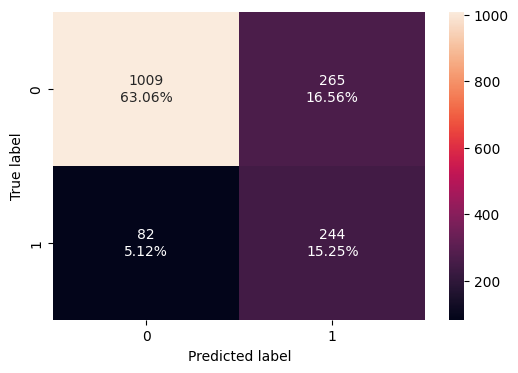

In [ ]:
make_confusion_matrix(y_val, y_val_pred_adamsmotedropout_lr_classweight_batch)

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
training_metric_df

Training performance comparison


,recall
SGD Model,0.453221
Adam Model,0.984663
Adam Model with Dropout,0.959356
SGD with SMOTE,0.807889
Adam with SMOTE,0.999019
Adam with SMOTE & Dropout,0.969584
Adam with SMOTE & Dropout & LR of 0.0001,0.871860
SGD with SMOTE & Dropout & LR of 0.0001,0.702512
Adam with SMOTE & Dropout & LR of 0.0001 & Balanced Class_weight,0.702512
Adam with SMOTE & Dropout & LR of 0.0001 & Balanced Class_weight & Batch Normalized,0.568485


In [ ]:
print("Validation set performance comparison")
validation_metric_df

Validation set performance comparison


,recall
SGD Model,0.411043
Adam Model,0.530675
Adam Model with Dropout,0.720859
SGD with SMOTE,0.690184
Adam with SMOTE,0.625767
Adam with SMOTE & Dropout,0.638037
Adam with SMOTE & Dropout & LR of 0.0001,0.699387
SGD with SMOTE & Dropout & LR of 0.0001,0.690184
Adam with SMOTE & Dropout & LR of 0.0001 & Balanced Class_weight,0.748466
Adam with SMOTE & Dropout & LR of 0.0001 & Balanced Class_weight & Batch Normalized,0.748466


In [ ]:
training_metric_df - validation_metric_df

,recall
SGD Model,0.042178
Adam Model,0.453988
Adam Model with Dropout,0.238497
SGD with SMOTE,0.117704
Adam with SMOTE,0.373252
Adam with SMOTE & Dropout,0.331547
Adam with SMOTE & Dropout & LR of 0.0001,0.172474
SGD with SMOTE & Dropout & LR of 0.0001,0.012328
Adam with SMOTE & Dropout & LR of 0.0001 & Balanced Class_weight,-0.045954
Adam with SMOTE & Dropout & LR of 0.0001 & Balanced Class_weight & Batch Normalized,-0.179981


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
import pandas as pd

def evaluate_model(actual_targets, predicted_targets, model_name):
    """
    Evaluates model by computing confusion matrix and key metrics.
    Returns a dictionary containing all the details.
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    tn, fp, fn, tp = cm.ravel()

    # Compute Metrics
    recall = recall_score(actual_targets, predicted_targets)
    precision = precision_score(actual_targets, predicted_targets)
    f1 = f1_score(actual_targets, predicted_targets)

    return {
        "Model": model_name,
        "TP": tp,
        "FP": fp,
        "FN": fn,
        "TN": tn,
        "Recall": recall,
        "Precision": precision,
        "F1-Score": f1
    }


In [ ]:
from tabulate import tabulate

results = []

# Run for different models
results.append(evaluate_model(y_val, y_val_pred_sgd, "SGD Model"))
results.append(evaluate_model(y_val, y_val_pred_adam, "Adam Model"))
results.append(evaluate_model(y_val, y_val_pred_adamdrop, "Adam Model with Dropout"))
results.append(evaluate_model(y_val, y_val_pred_sgdsmote, "SGD with SMOTE"))
results.append(evaluate_model(y_val, y_val_pred_adamsmote, "Adam with SMOTE"))
results.append(evaluate_model(y_val, y_val_pred_adamsmotedropout, "Adam with SMOTE & Dropout"))
results.append(evaluate_model(y_val, y_val_pred_adamsmotedropout_lr, "Adam with SMOTE & Dropout & LR 0.0001"))
results.append(evaluate_model(y_val, y_val_pred_sgdsmotedropout_lr, "SGD with SMOTE & Dropout & LR 0.0001"))
results.append(evaluate_model(y_val, y_val_pred_adamsmotedropout_lr_classweight, "Adam with SMOTE & Dropout & LR 0.0001 & Class Weight"))
results.append(evaluate_model(y_val, y_val_pred_adamsmotedropout_lr_classweight, "Adam with SMOTE & Dropout & LR 0.0001 & Class Weight & Batch Normalized"))

# Convert results to a DataFrame for easy comparison
df_results = pd.DataFrame(results,index=np.arange(1, len(results) + 1))

# Sort models by highest Recall (since you prioritize FN reduction)
df_results.sort_values(by="Recall", ascending=False, inplace=True)

# Display the results in a table with lines
print(tabulate(df_results, headers="keys", tablefmt="grid"))

+----+-------------------------------------------------------------------------+------+------+------+------+----------+-------------+------------+
|    | Model                                                                   |   TP |   FP |   FN |   TN |   Recall |   Precision |   F1-Score |
+====+=========================================================================+======+======+======+======+==========+=============+============+
|  9 | Adam with SMOTE & Dropout & LR 0.0001 & Class Weight                    |  244 |  265 |   82 | 1009 | 0.748466 |    0.479371 |   0.584431 |
+----+-------------------------------------------------------------------------+------+------+------+------+----------+-------------+------------+
| 10 | Adam with SMOTE & Dropout & LR 0.0001 & Class Weight & Batch Normalized |  244 |  265 |   82 | 1009 | 0.748466 |    0.479371 |   0.584431 |
+----+-------------------------------------------------------------------------+------+------+------+------+----------

### **Summary of Model Performance & Insights**  

#### **Best Performing Models**  
- **Adam with SMOTE, Dropout, LR 0.0001 & Class Weight (Model 9 & 10)** achieved the highest recall (**0.748**) and best F1-score (**0.584**).  
- Batch Normalization had no impact on performance, making **Model 9 (Adam with SMOTE, Dropout, LR 0.0001 & Class Weight)** the preferred choice.  

#### **Key Insights**  

#### 🔹 Impact of SMOTE  
- Models trained with **SMOTE (Synthetic Minority Over-sampling Technique)** consistently outperformed those without it.  
- Handling class imbalance significantly improves recall, reducing false negatives.  

#### 🔹 Impact of Class Weight  
- Adding **class weight** improved recall  
- Models without class weighting had **lower recall**.  

#### 🔹 Impact of Dropout & Batch Normalization  
- **Dropout** generally improved recall but slightly reduced precision.  
- **Batch Normalization** (Model 10) did not provide additional improvement over Model 9.  

#### 🔹 Optimizer Performance  
- **Adam optimizer** consistently outperformed **SGD** in this project.  

#### 🔹 Learning Rate Adjustment  
- Lowering the learning rate to **0.0001** boosted recall performance, showing that **smaller steps helped the model generalize better**.  

#### 🔹 Performance of SGD Models  
- **SGD models** had lower recall and F1-score compared to Adam.  
- **SGD with SMOTE, Dropout & LR 0.0001 (Model 8)** had very low precision (**0.37**), leading to many false positives.  


## Test the data using the Best Model

In [ ]:
#Predicting the results on the Test set
y_test_pred = model_9.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
y_test_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
#Classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.73      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



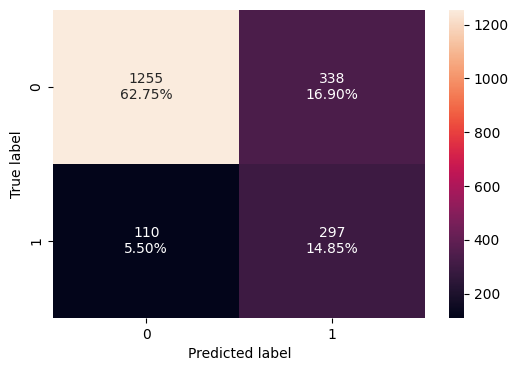

In [ ]:
make_confusion_matrix(y_test,y_test_pred)

### **Test Set Results**  

#### **Key Metrics Calculation**  
- **True Positives (TP):** 297 (Correctly predicted as 1)  
- **False Positives (FP):** 338 (Incorrectly predicted as 1)  
- **False Negatives (FN):** 110 (Missed actual 1s)  
- **True Negatives (TN):** 1255 (Correctly predicted as 0)  

#### **Insights**  
- **Good recall for churners (73%)** → The model successfully identifies a large portion of actual churners.  
- **High false positives (FP = 338)** → Some customers are incorrectly classified as churners, which could lead to unnecessary retention efforts.  
- **Balanced F1-score (57% for churners, 85% for non-churners)** → While the model performs well for non-churners, **there’s room for improvement in detecting churners**.  
- **Overall Model Behavior:** The model is more **conservative** (higher recall, lower precision for churners), prioritizing **capturing churners over avoiding false churn predictions**.  


## Actionable Insights and Business Recommendations

### **Actionable Insights**  

- **Adam with SMOTE, Dropout, LR 0.0001 & Class Weight** is the **best-performing model** in terms of recall.  
- Reducing **false negatives** helps retain more customers, improving business revenue.  
- Using the model's predictions, **proactive strategies** can help **reduce churn** and **increase customer lifetime value**.  

#### **Balance Recall & Precision**  
- There is still **room to improve recall**, which will help reduce **false negatives**.  
- If **false positives** are proving costly (leading to unnecessary focus on the wrong customers), **improving precision** by adjusting **decision thresholds** is necessary.  

#### **Further Optimization Strategies**  
- **Fine-tune the learning rate & dropout rate** to improve precision without sacrificing recall.  
- **Experiment with different batch normalization placements** to check for performance variations.  

---

### **Business Recommendations**  

1️⃣ **Implement the Best Model for Customer Churn Prediction**  
   - Deploy **"Adam with SMOTE, Dropout, LR 0.0001 & Class Weight"** to predict churn effectively.  
   - Monitor real-world performance and **fine-tune hyperparameters** if needed.  

2️⃣ **Take Proactive Steps to Retain High-Risk Customers**  
   - Use the model to **identify customers with high churn probability**.  
   - Offer **personalized retention campaigns** (discounts, loyalty programs, better customer service).  

3️⃣ **Improve Data Collection & Feature Engineering**  
   - Investigate additional features (e.g., **customer complaints**) and perform further analysis to optimize the model.  

4️⃣ **Consider Real-Time Prediction for Early Intervention**  
   - Implement the model in real-time to **trigger automated retention strategies**.  

5️⃣ **Regular Model Monitoring**  
   - Ensure the model remains **up to date** and adapts to new patterns.  

6️⃣ **Improve Precision for Churners**  
   - Since the **false positive rate is high**, refine the model to **reduce misclassifications of loyal customers as churners**.  


<font size=6 color='blue'>Power Ahead</font>
___